# Very Good resource (Forecasting: Principles and Practice)

## https://otexts.com/fpp2/

### Trend (Gradual long term increase/decrease, a slope, not have to be linear)

- Higher highs and Higher lows as go forward in time :  Uptrend
- Lower highs and Lower lows as go forward in time :  Downtrend  
- No prticular change in highs and lows: Horizontal trend

### Seasonality
- Changes that happend over a year, at a **fix interval** (hour of the day, week, month, year), fixed frequency. Associated with some aspect of the calender.
- Seasonal trends does the require that peaks of seasonal events stay the same through out time. They can increase or decrease without being part of trend behavior.

### Cyclical

- The changes happend over one year interval or does not have a fixed interval, time from recession to another for example. This is unknown pattern showing up and is not repeated in past or may not even in future. Stock market sudden changes, business cycles.
- Generally the intervals hard to predict and longer than seasonal patterns (some cases at least over 2 years). Also their change magnitude (y) is bigger than seasonal change.

### Residual

- The difference between actual observation and the forcast. Considering for forcast the Trend/Seasonality is considered. The remaining is residual (remainder) that could not be forcasted.

### Exponential Smoothing
- Use weighted average of previous observations, giving more weight to more recent observation and gradually less weight to older observations
- **ETS (Error,  Trend, Seasonality)** shows how each of terms Error, Trend and Seasonality can be added to the smoothing method additively, multiplicately or not added at all.
- Time Series decomposition plots, give us observed/trend/seasonal/residual data
- The trend is the centralized moving average of observed data sitting between peak and valley of observation seasonality (de-seasonalized)
- By visualization of time series decomposition can say whether or not we need to add (constant additivies or multiplicative) to the terms. If trend each new time increase with constant time (linear) we add, but if each time it is growing (e.g. exponential) we multiply. 
- The same is True for seasonal effect. If stays constatnt through time is additive, but it grows inamplitude is multiplicative. 

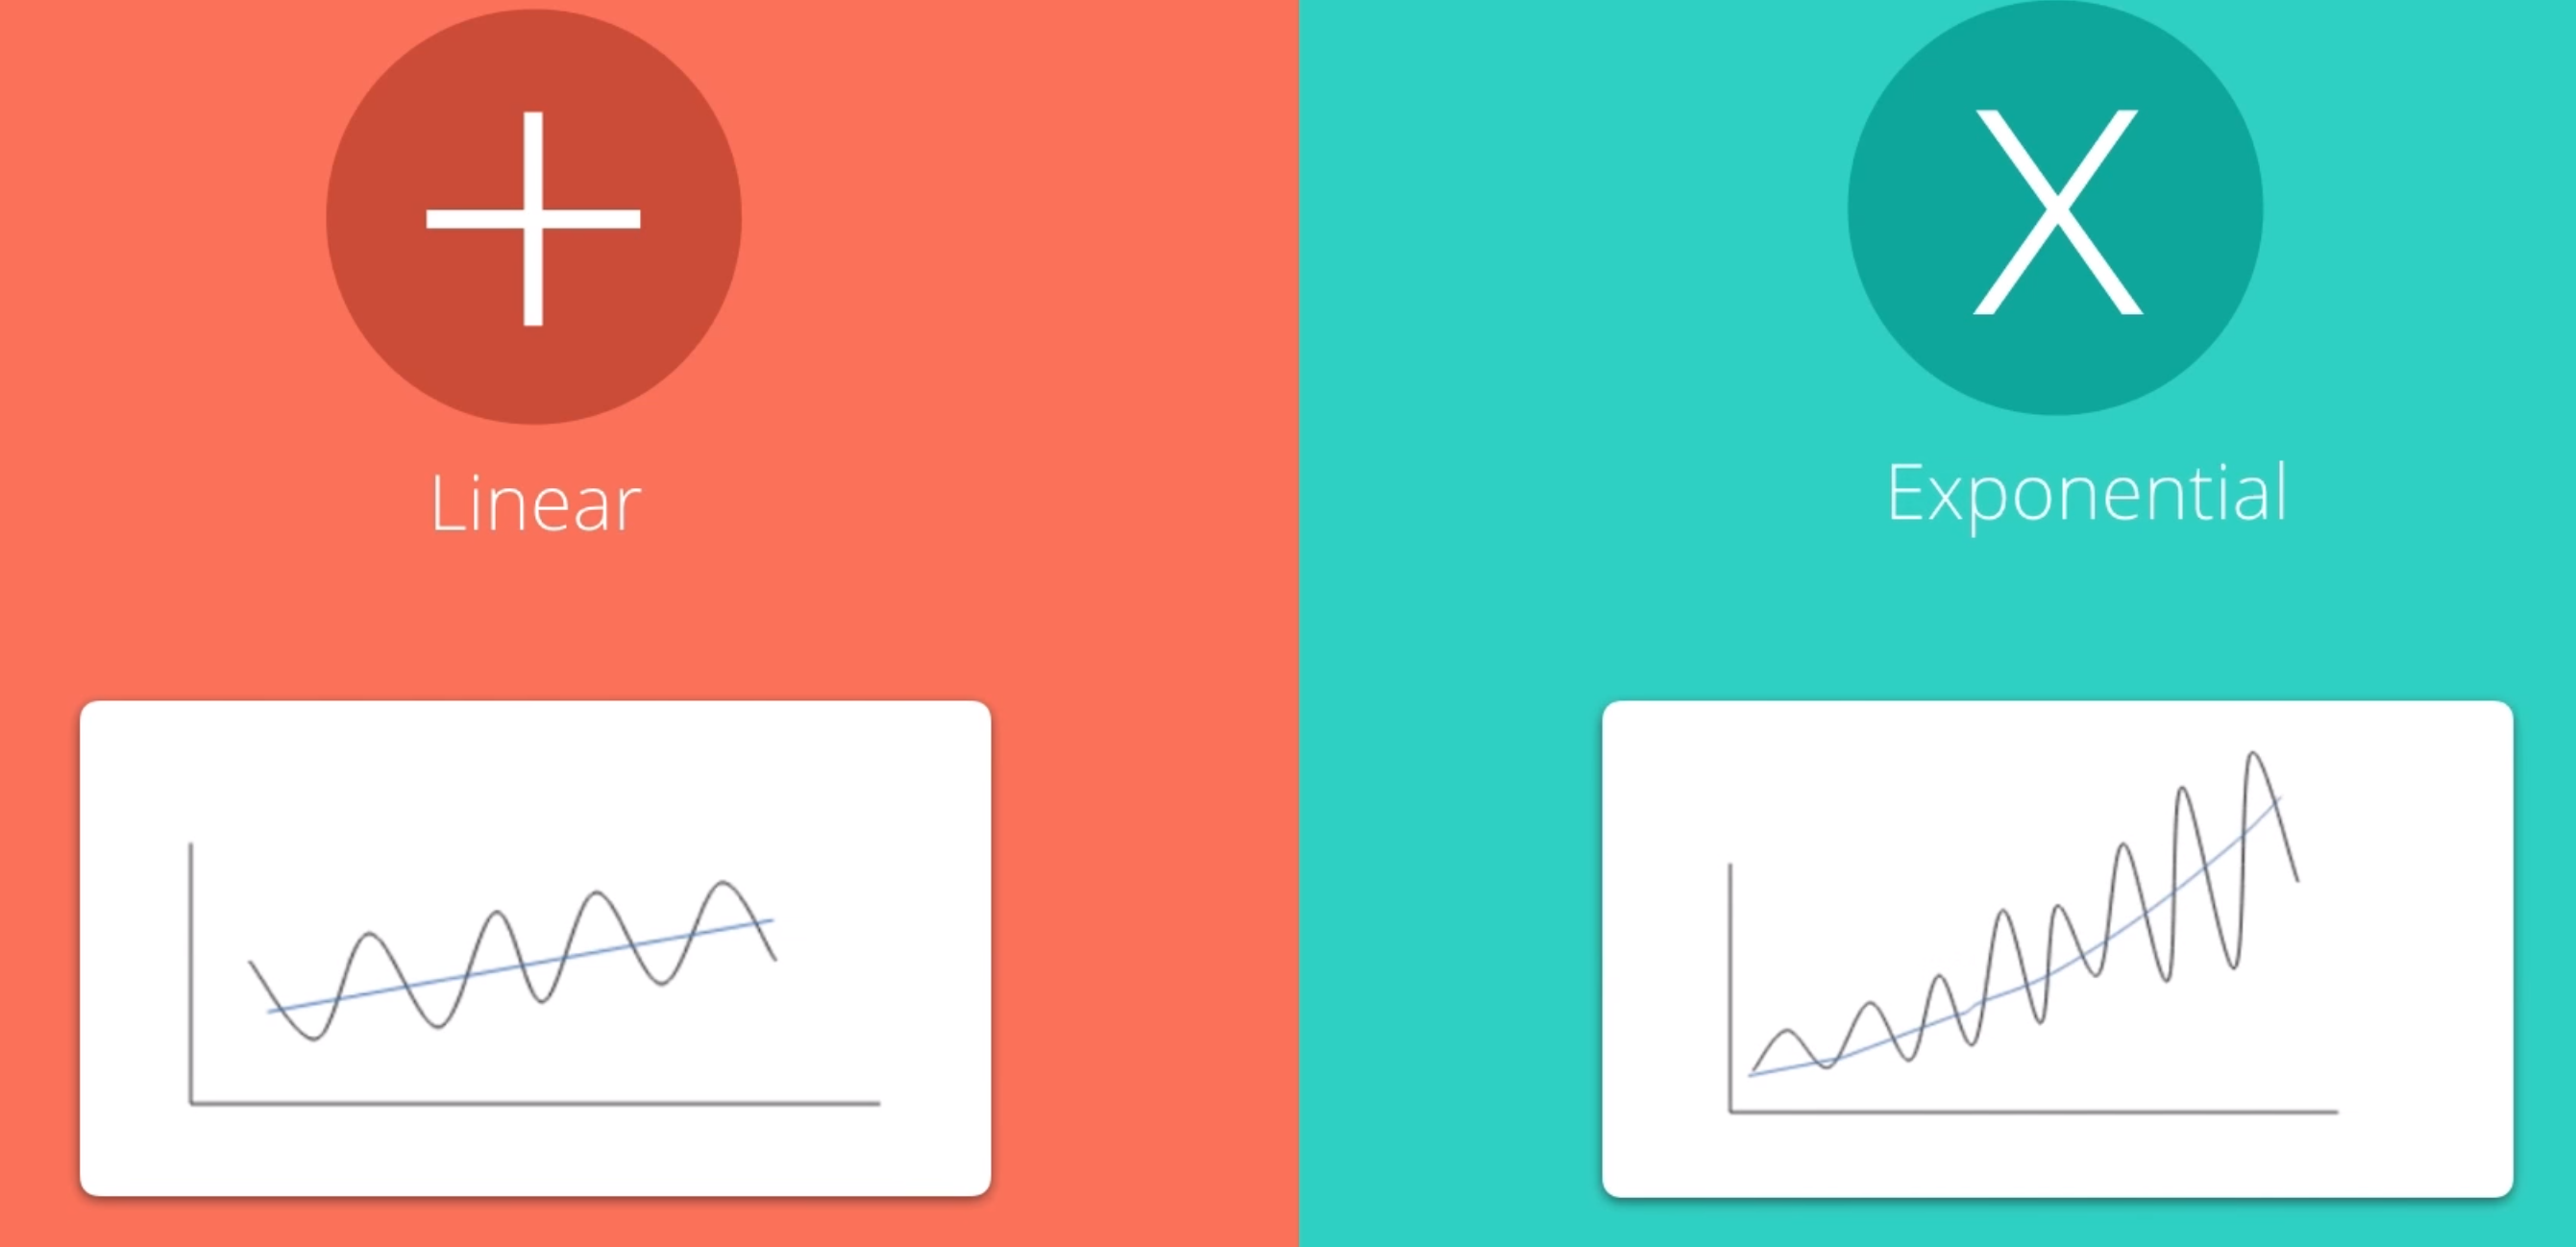

In [146]:
from IPython.display import Image
Image("img/add_multiply.png")

### Scenarios
Therefore the scenarios could be:

- No-Trend, No-Seasonal
- No-Trend, Seasonal-Constant
- No-Trend, Seasonal-Increasing
- Trend-Linear,No-Seasonal
- Trend-Linear,Seasonal-Constant
- Trend-Linear,Seasonal-Increasing
- Trend-Exponential,No-Seasonal
- Trend-Exponential,Seasonal-Constant
- Trend-Exponential,Seasonal-Increasing

### ETS (Error/Trend/Seasonality) Models

- Simple Exponential Smoothing Method
- Holt's Linear Trend Method
- Exponential Trend Method
- Holt-Winters Seasonal Method

### Simple Exponential Smoothing

- **Exponential smoothing useful when there is no specific pattern in Trend or in Seasonal data.** Data of time stamp "T+1" is calculated using contribution of terms from past until time "T".
- This is controlled by coefficient **alpha**, the smaller **alpha**, more even contribution from each past time stamp. The bigger **alpha** more contribution from recent.
- An event more smiplified version over simple exponential smoothing is using Naive approach and only use value of last time stamp for forcast. Another simple option is getting average of all time stamps in the past (with similar weights) to get new "T+1".
- For rolling average, is very close to the simple exponential one but in the rolling windows (moving average), all weights are constant.
- Sum of all weights with enough data points in the past for simple cexponential model adds up to 1.
- In order to optimize for **alpha** need to look for error created but each **alpha** and iteratively move toward a different **alpha** value to reduce the error **SSE** (sum of the squared error). Resemble Gradient descent, the problem is compare to linear regression, there is no based equation (linear form with unknown coefficients) for getting derivative.
- Need to to optimization to find appropriate **alpha**.

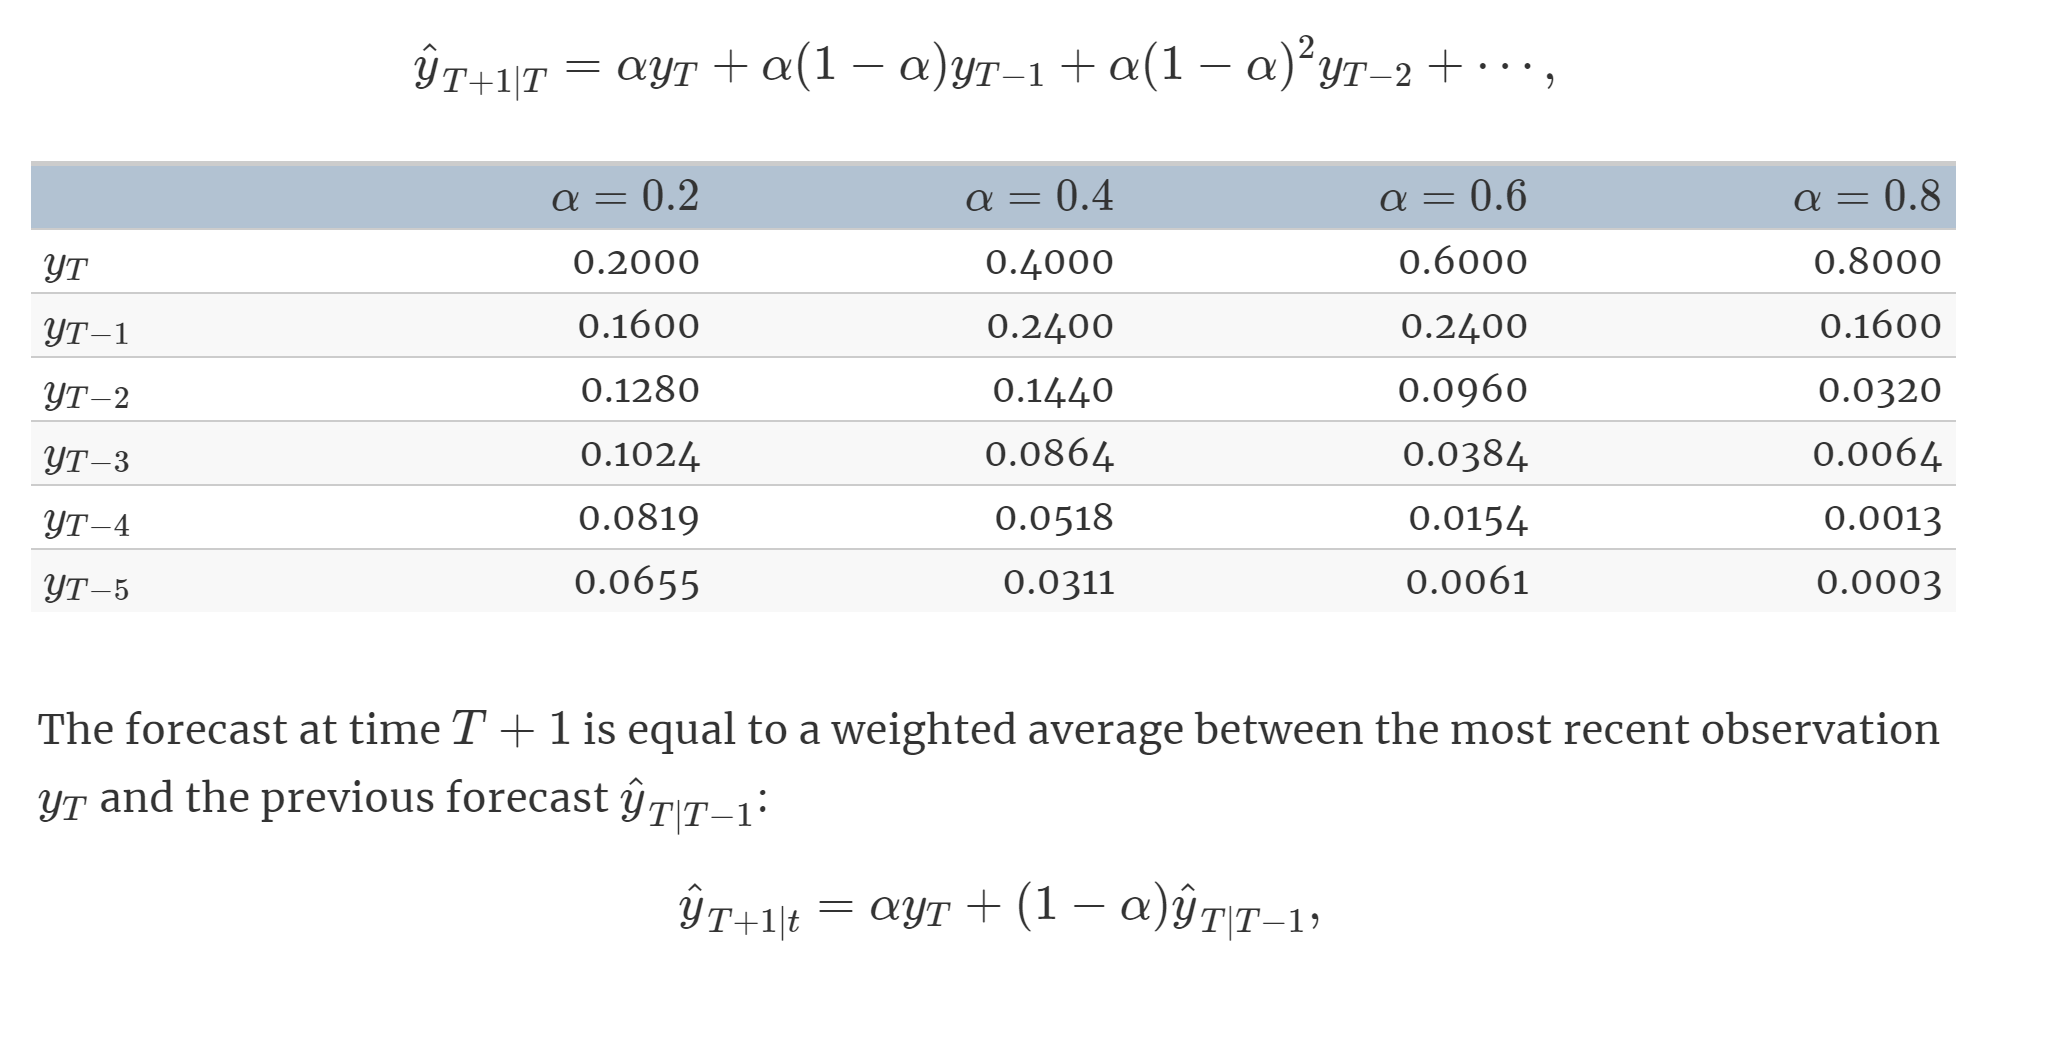

In [147]:
from IPython.display import Image
Image("img/simple_exponential_smoothing.png")

Weights as a function of **alpha**

- Simple exponential smoothing has no trend , no seasonality, therefore for forcast we have flat component
- {l_t} level is calculated using formula above and observation data but when it gets to forcasting the unknown data value of level_t18 at fixed rate is used.

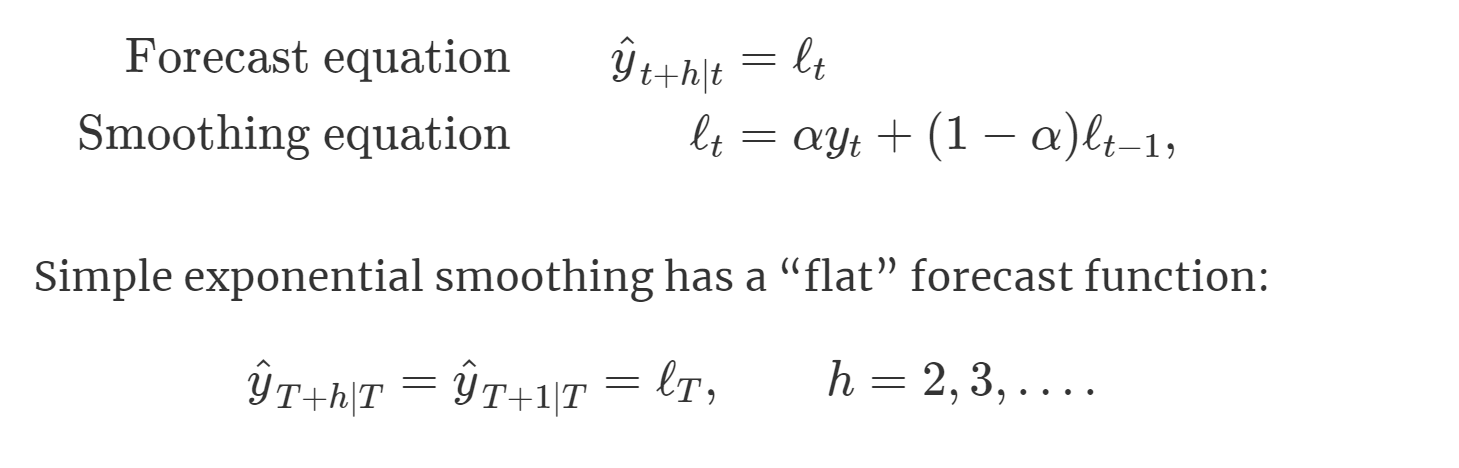

In [148]:
from IPython.display import Image
Image("img/simple_exponential_forcast2.png",width=700)

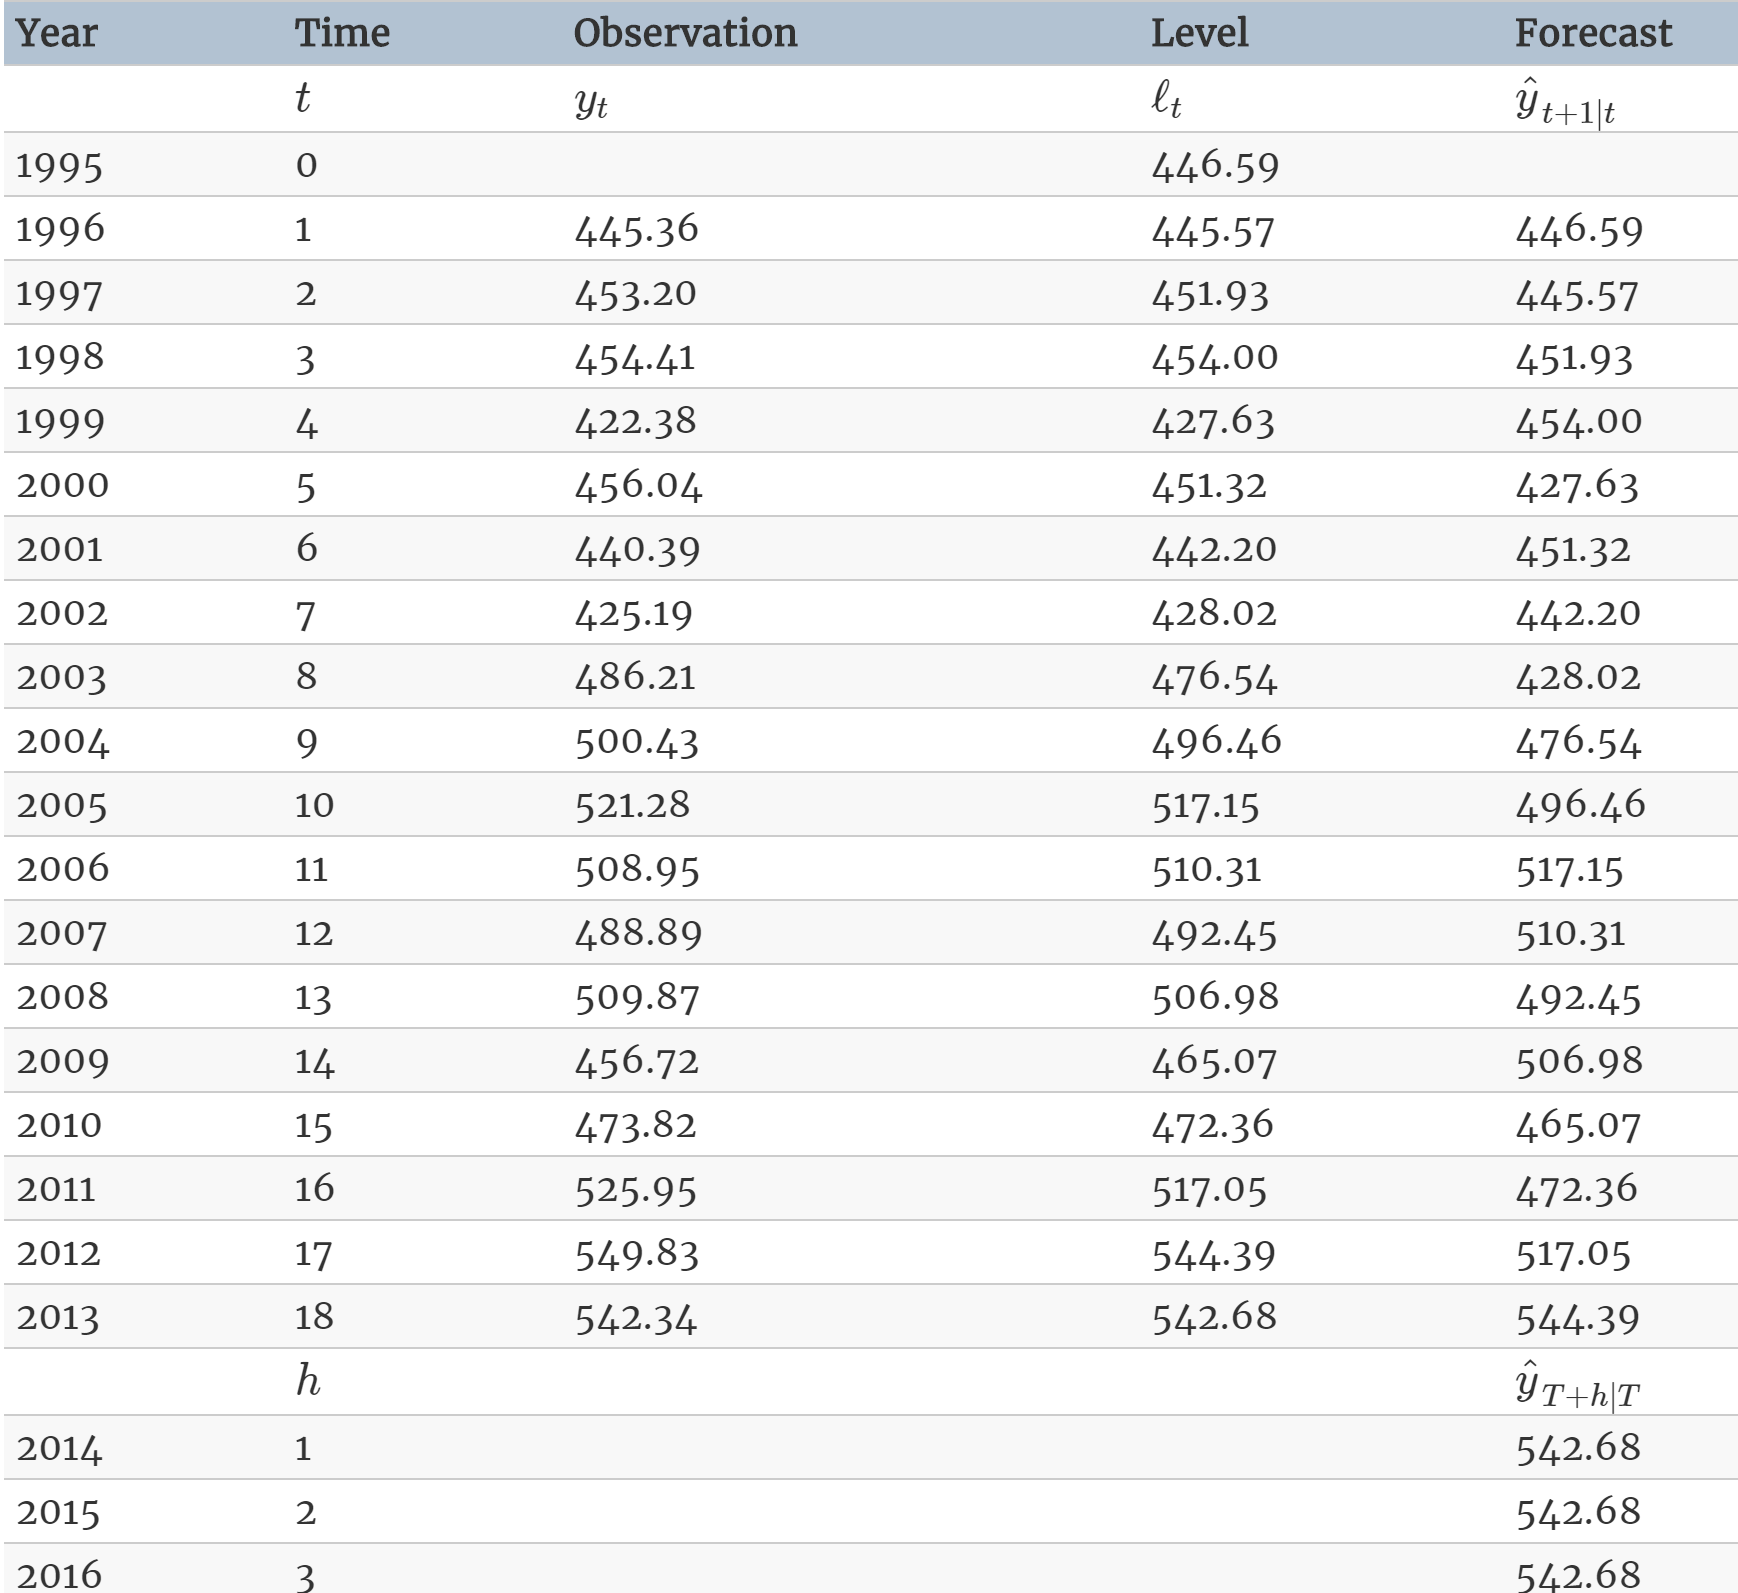

In [149]:
Image("img/simple_exponential_forcast.png")

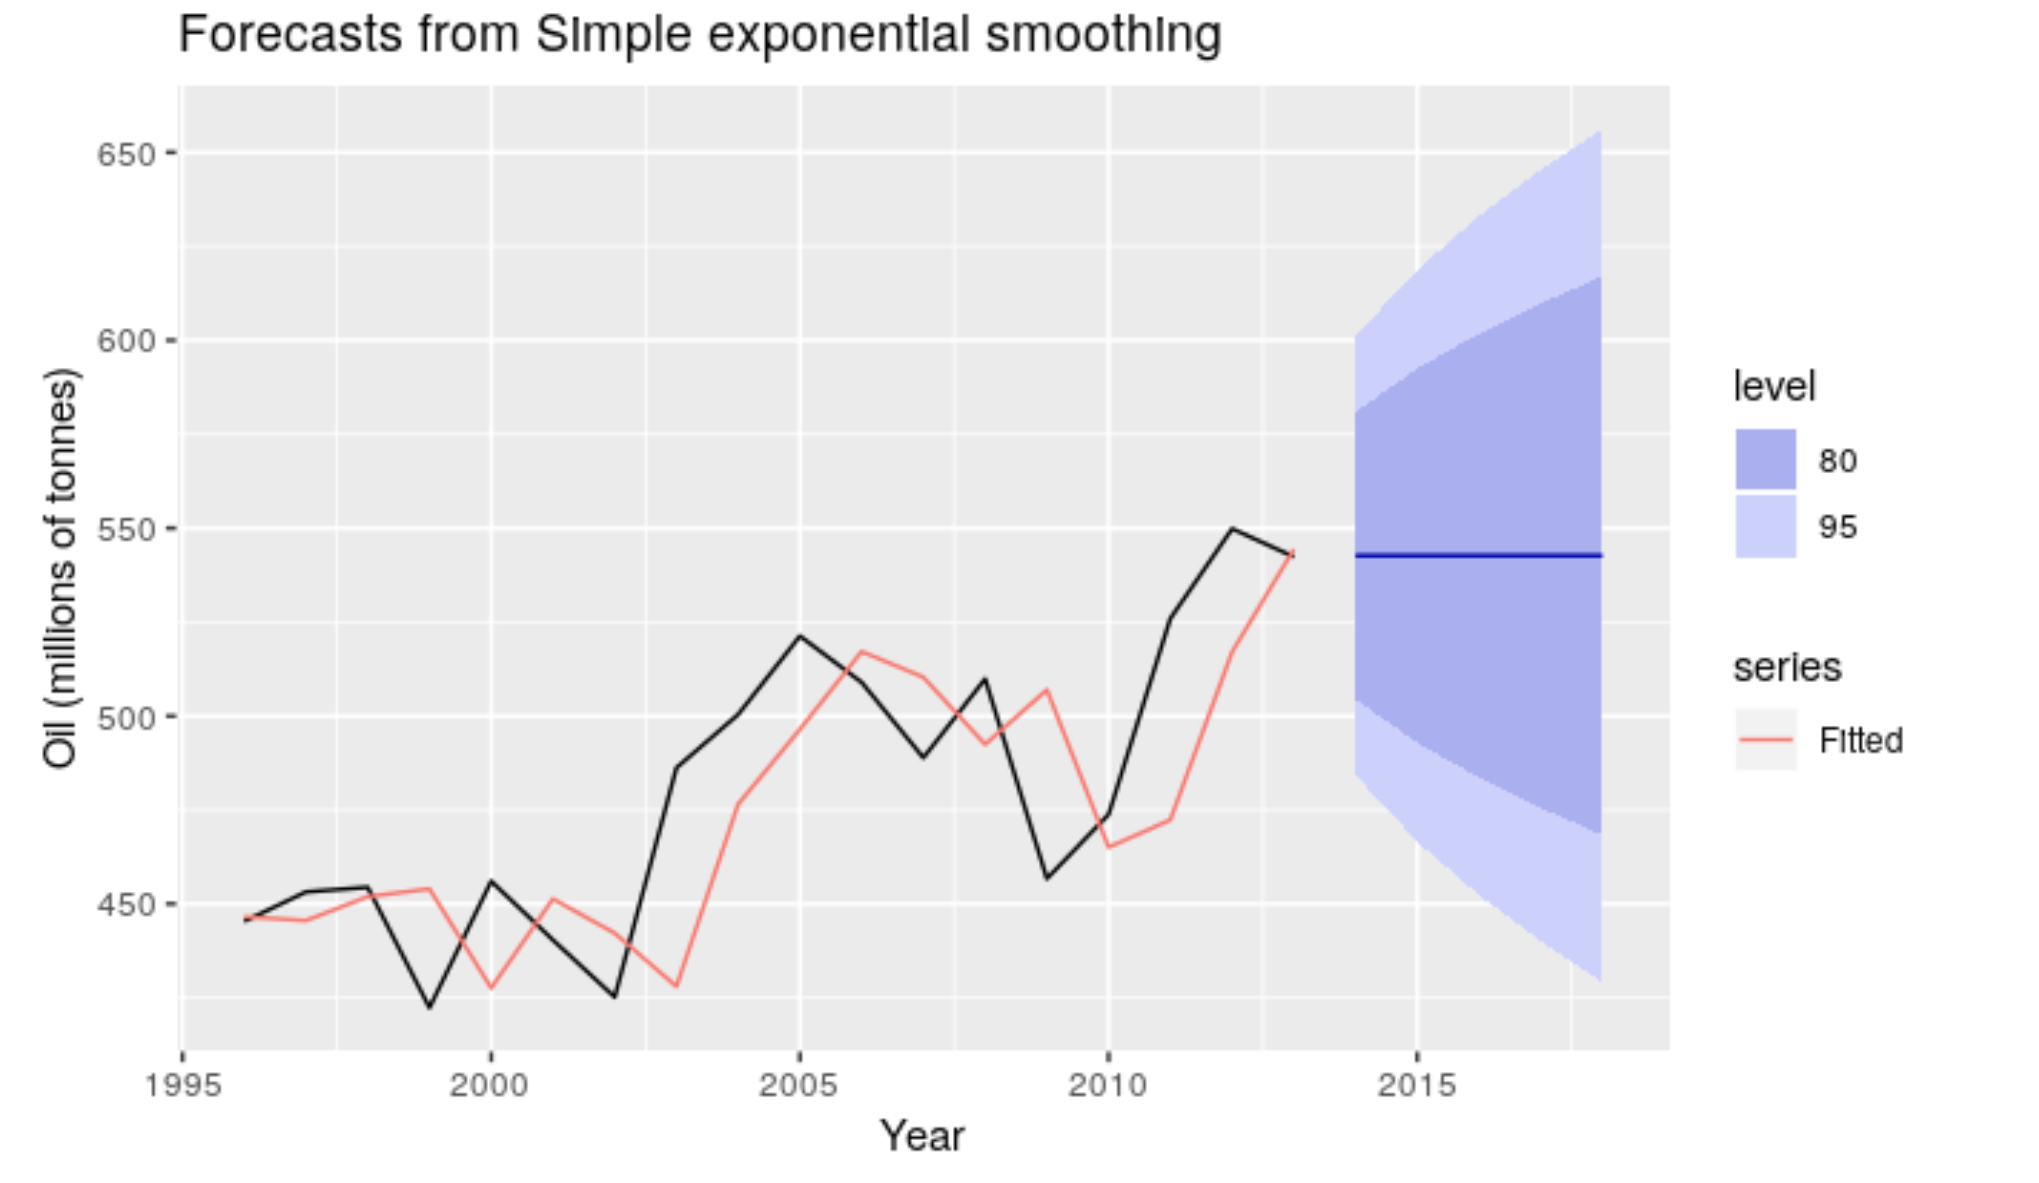

In [150]:
Image("img/forcast_simple_exp.png")

### Holt Linear Model (double exponential smoothing)
#### Consider trend line but not seaonality by using alpha and beta coefficient

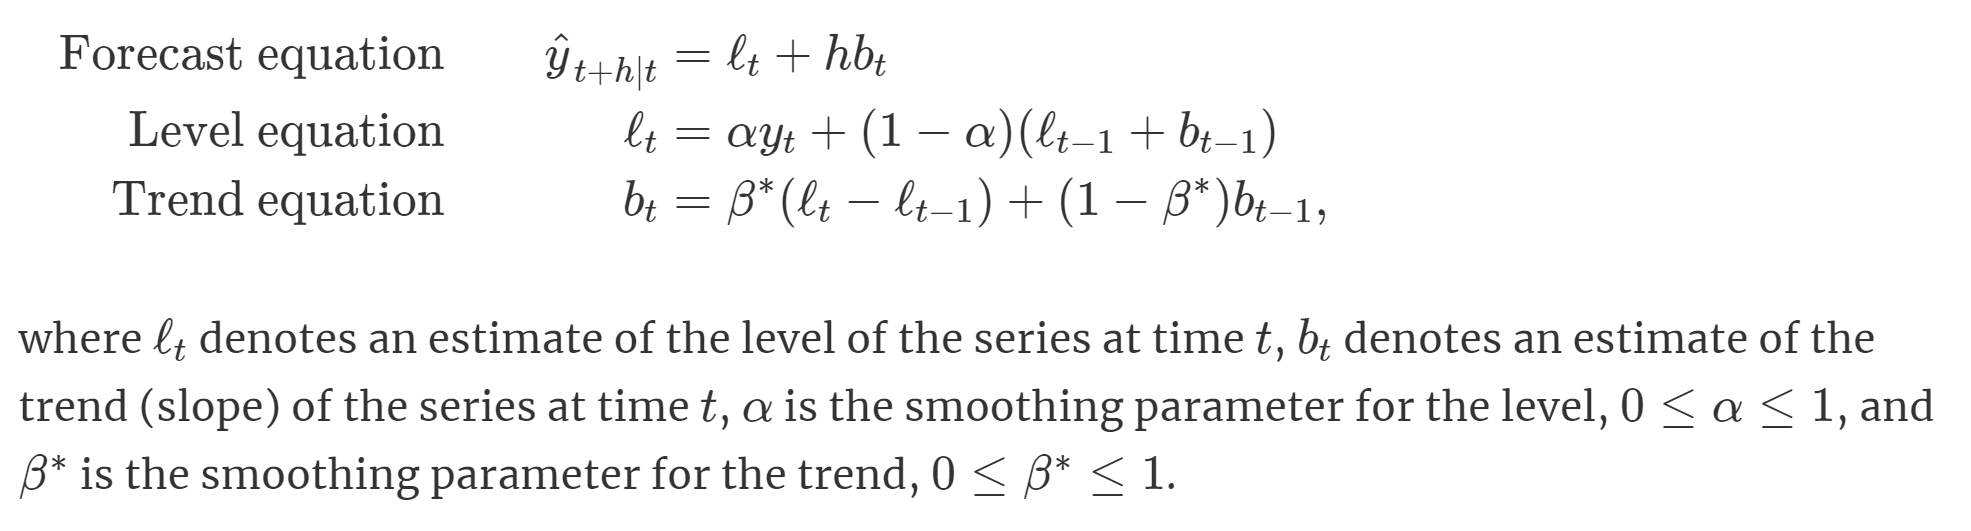

In [151]:
Image("img/holt_linear.png")

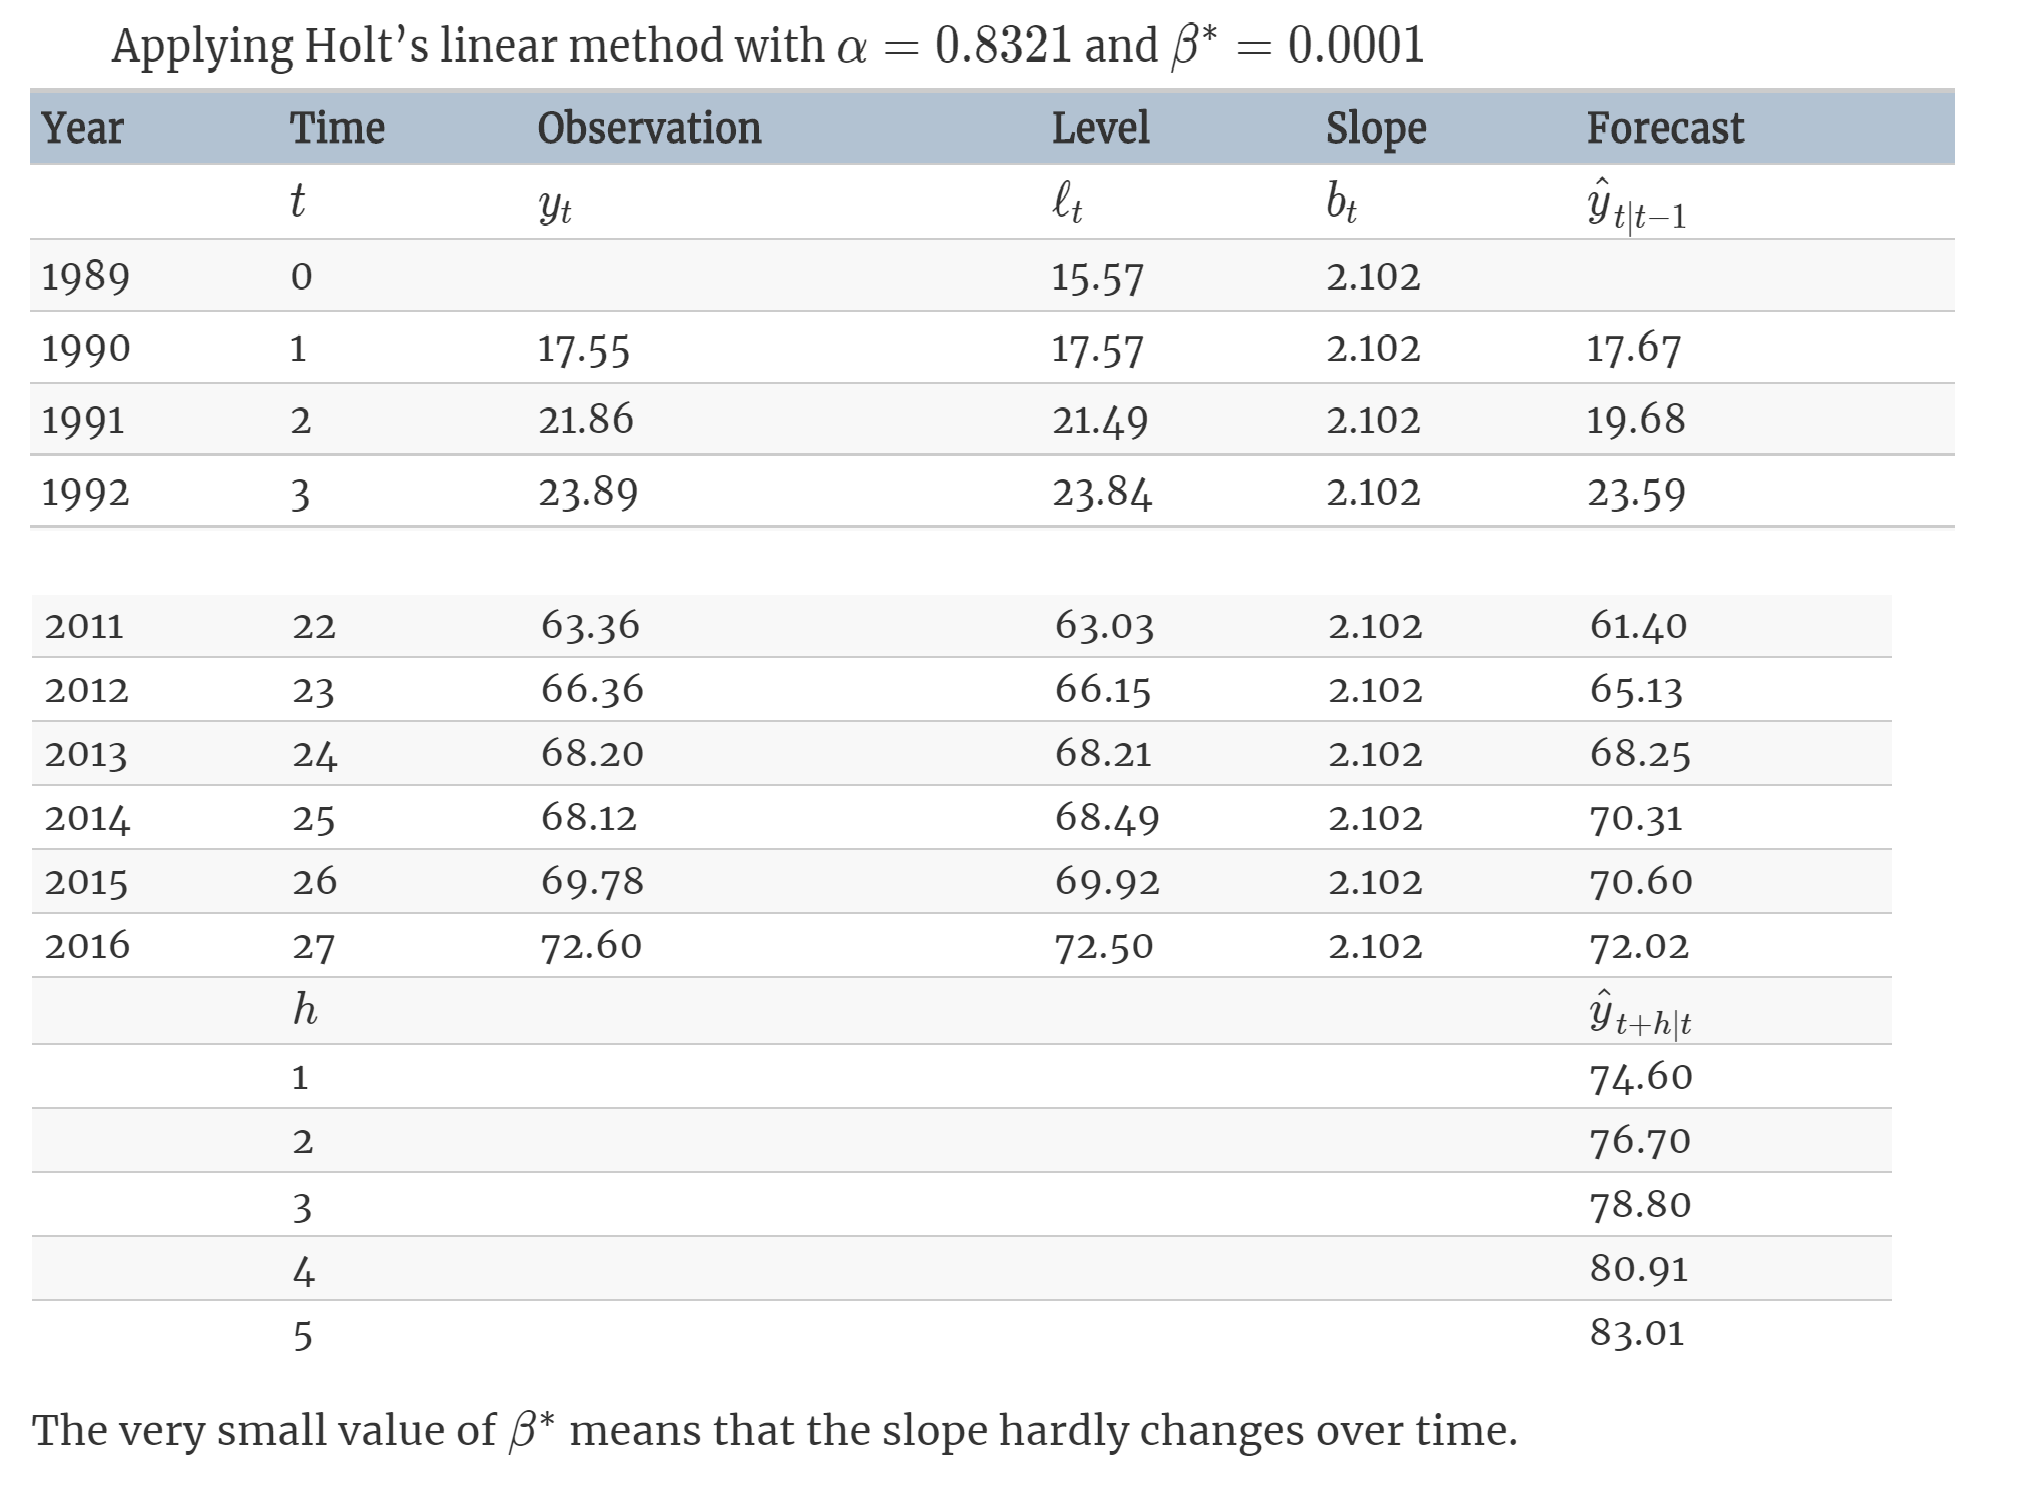

In [152]:
Image("img/holt_linear2.png")

The forecasts generated by Holt’s linear method display a constant trend (increasing or decreasing) indefinitely into the future. Empirical evidence indicates that these methods tend to over-forecast, especially for longer forecast horizons. Motivated by this observation, Gardner & McKenzie (1985) introduced a parameter that “dampens” the trend to a flat line some time in the future. 

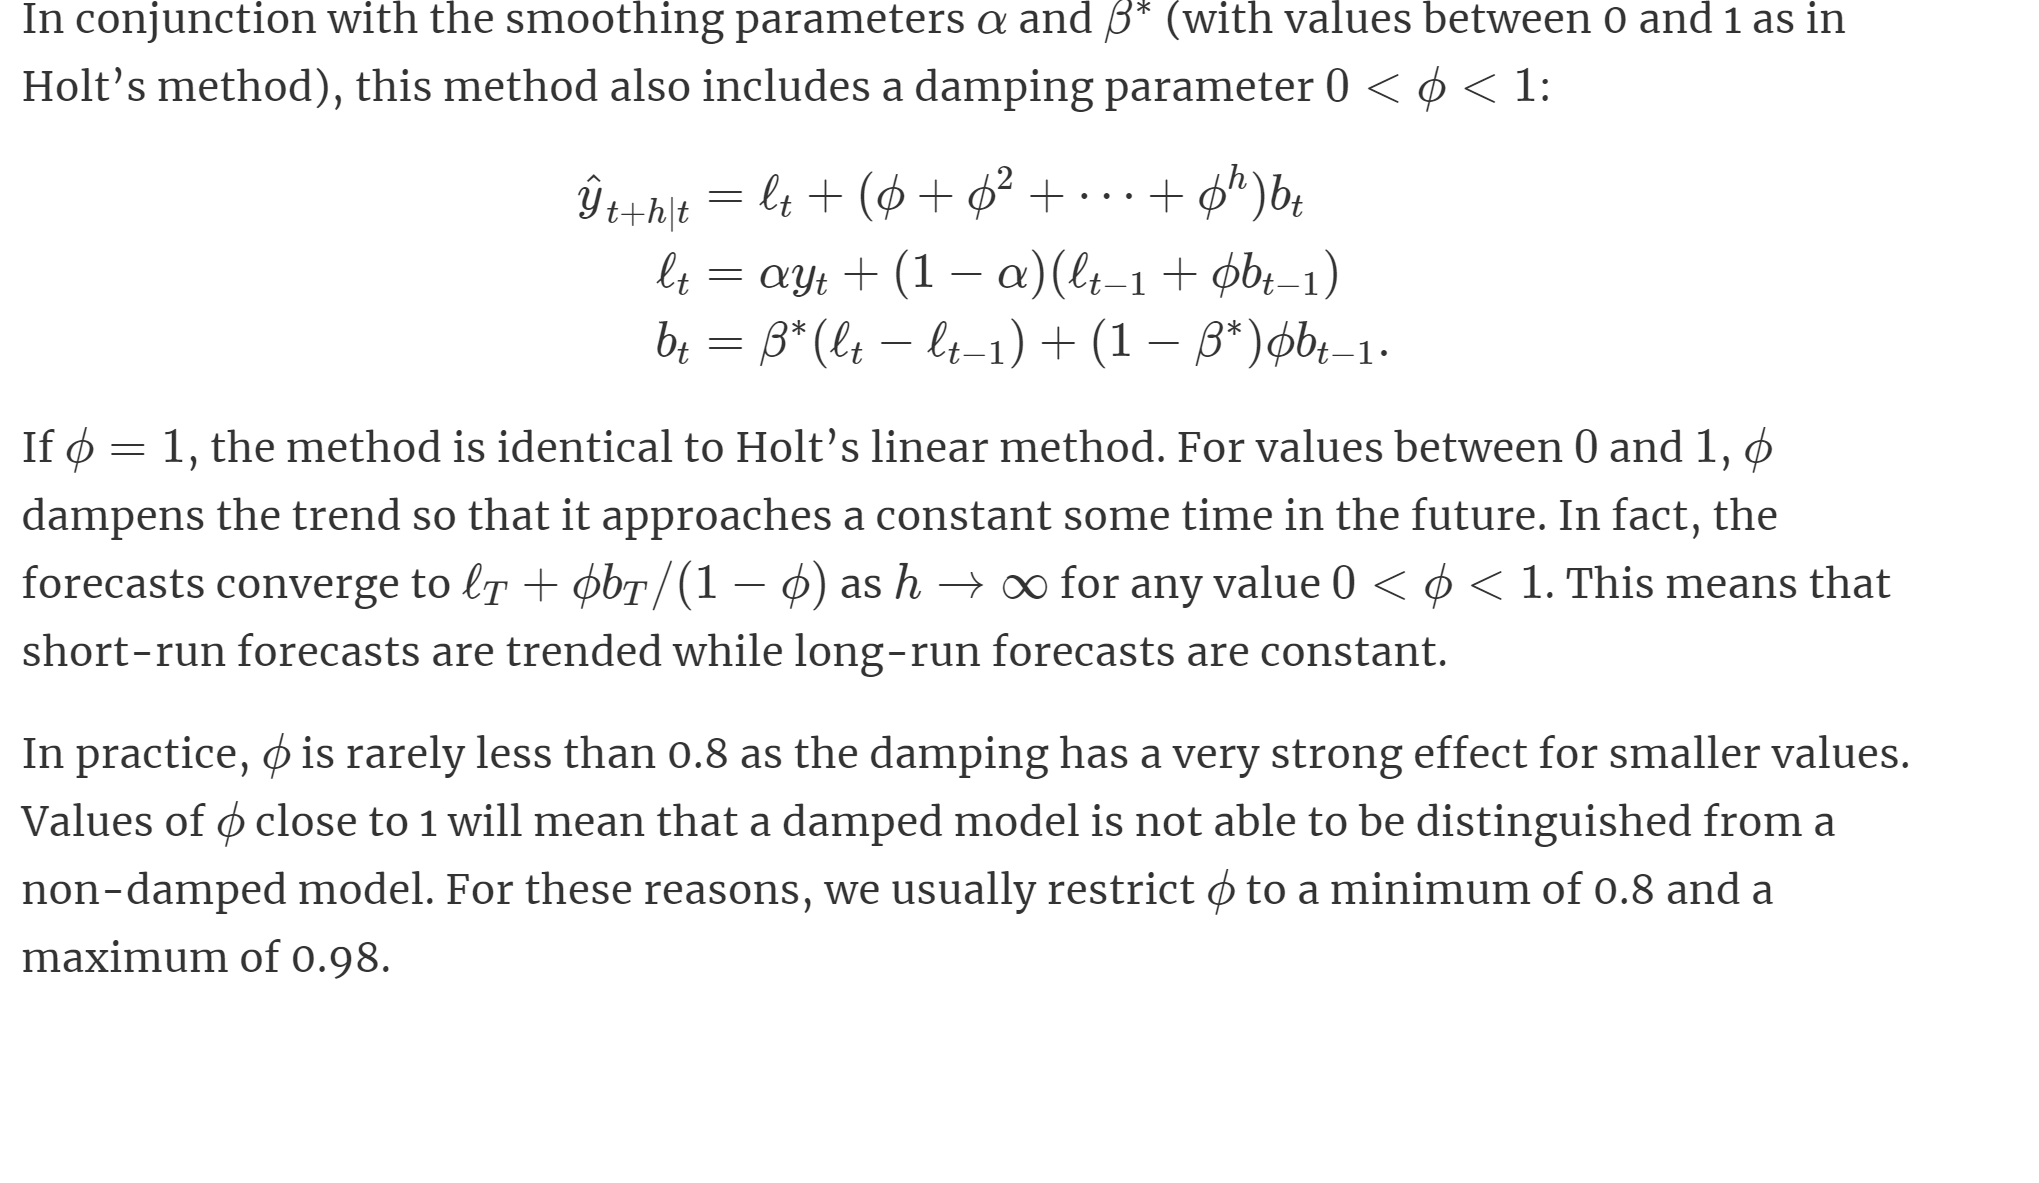

In [153]:
Image("img/holt_linear_damped.png")

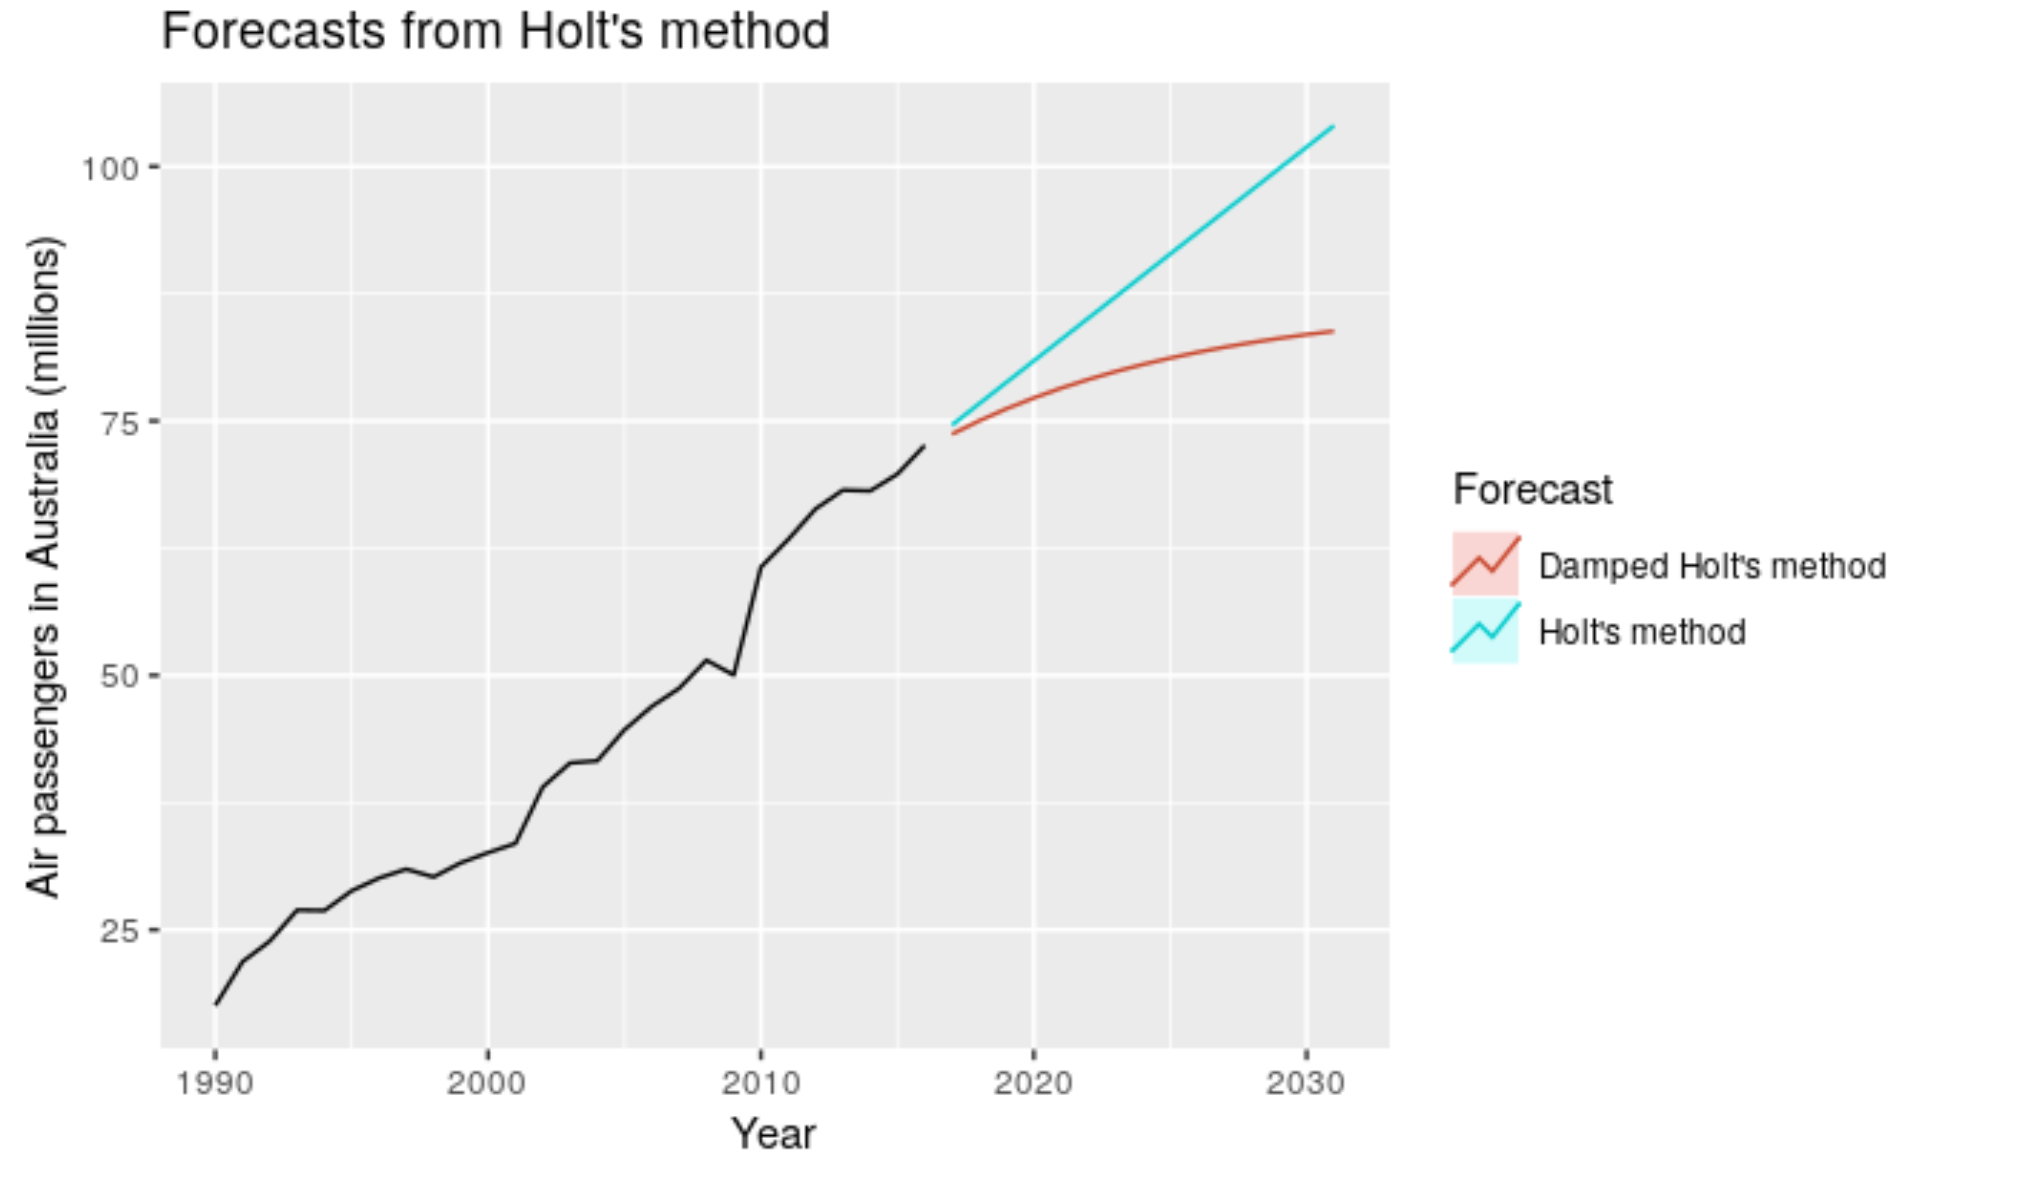

In [154]:
Image("img/forcast_holt_damp.png")

## Exponential trend

### When the trend instead of moving linearly increase multiplicatively (this can be applied on either of trend or seasonality)

## Forcast

Multiplicative seasonal should have varying oscillation

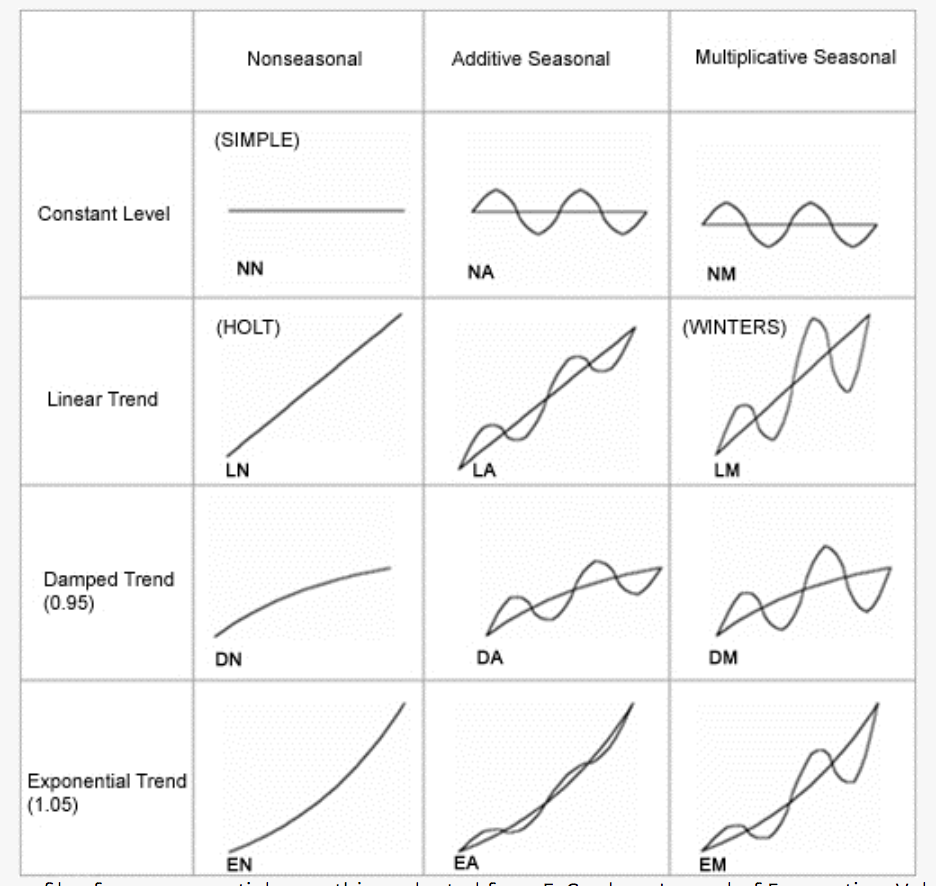

In [155]:
Image("img/comparison_methods.png")

## Holt-Winter seasonal
### Additive on trend, additive & multiplicative for seasons

- The Holt-Winters seasonal method comprises the forecast equation and three smoothing equations — one for the level ℓ_t , one for the trend b_t, and one for the seasonal component s_t, with corresponding smoothing parameters α , β∗ and γ. We use m to denote the frequency of the seasonality, i.e., the number of seasons in a year. For example, for quarterly data m=4, and for monthly data m=12.
- There are two variations to this method that differ in the nature of the seasonal component. The additive method is preferred when the seasonal variations are roughly constant through the series, while the multiplicative method is preferred when the seasonal variations are changing proportional to the level of the series. With the **additive method**, the seasonal component is expressed in absolute terms in the scale of the observed series, and in the level equation the **series is seasonally adjusted by subtracting the seasonal component**. Within each year, the seasonal component will add up to approximately zero. With the **multiplicative method**, the seasonal component is expressed in relative terms (percentages), and the series is **seasonally adjusted by dividing series through by the seasonal component**. Within each year, the seasonal component will sum up to approximately m.

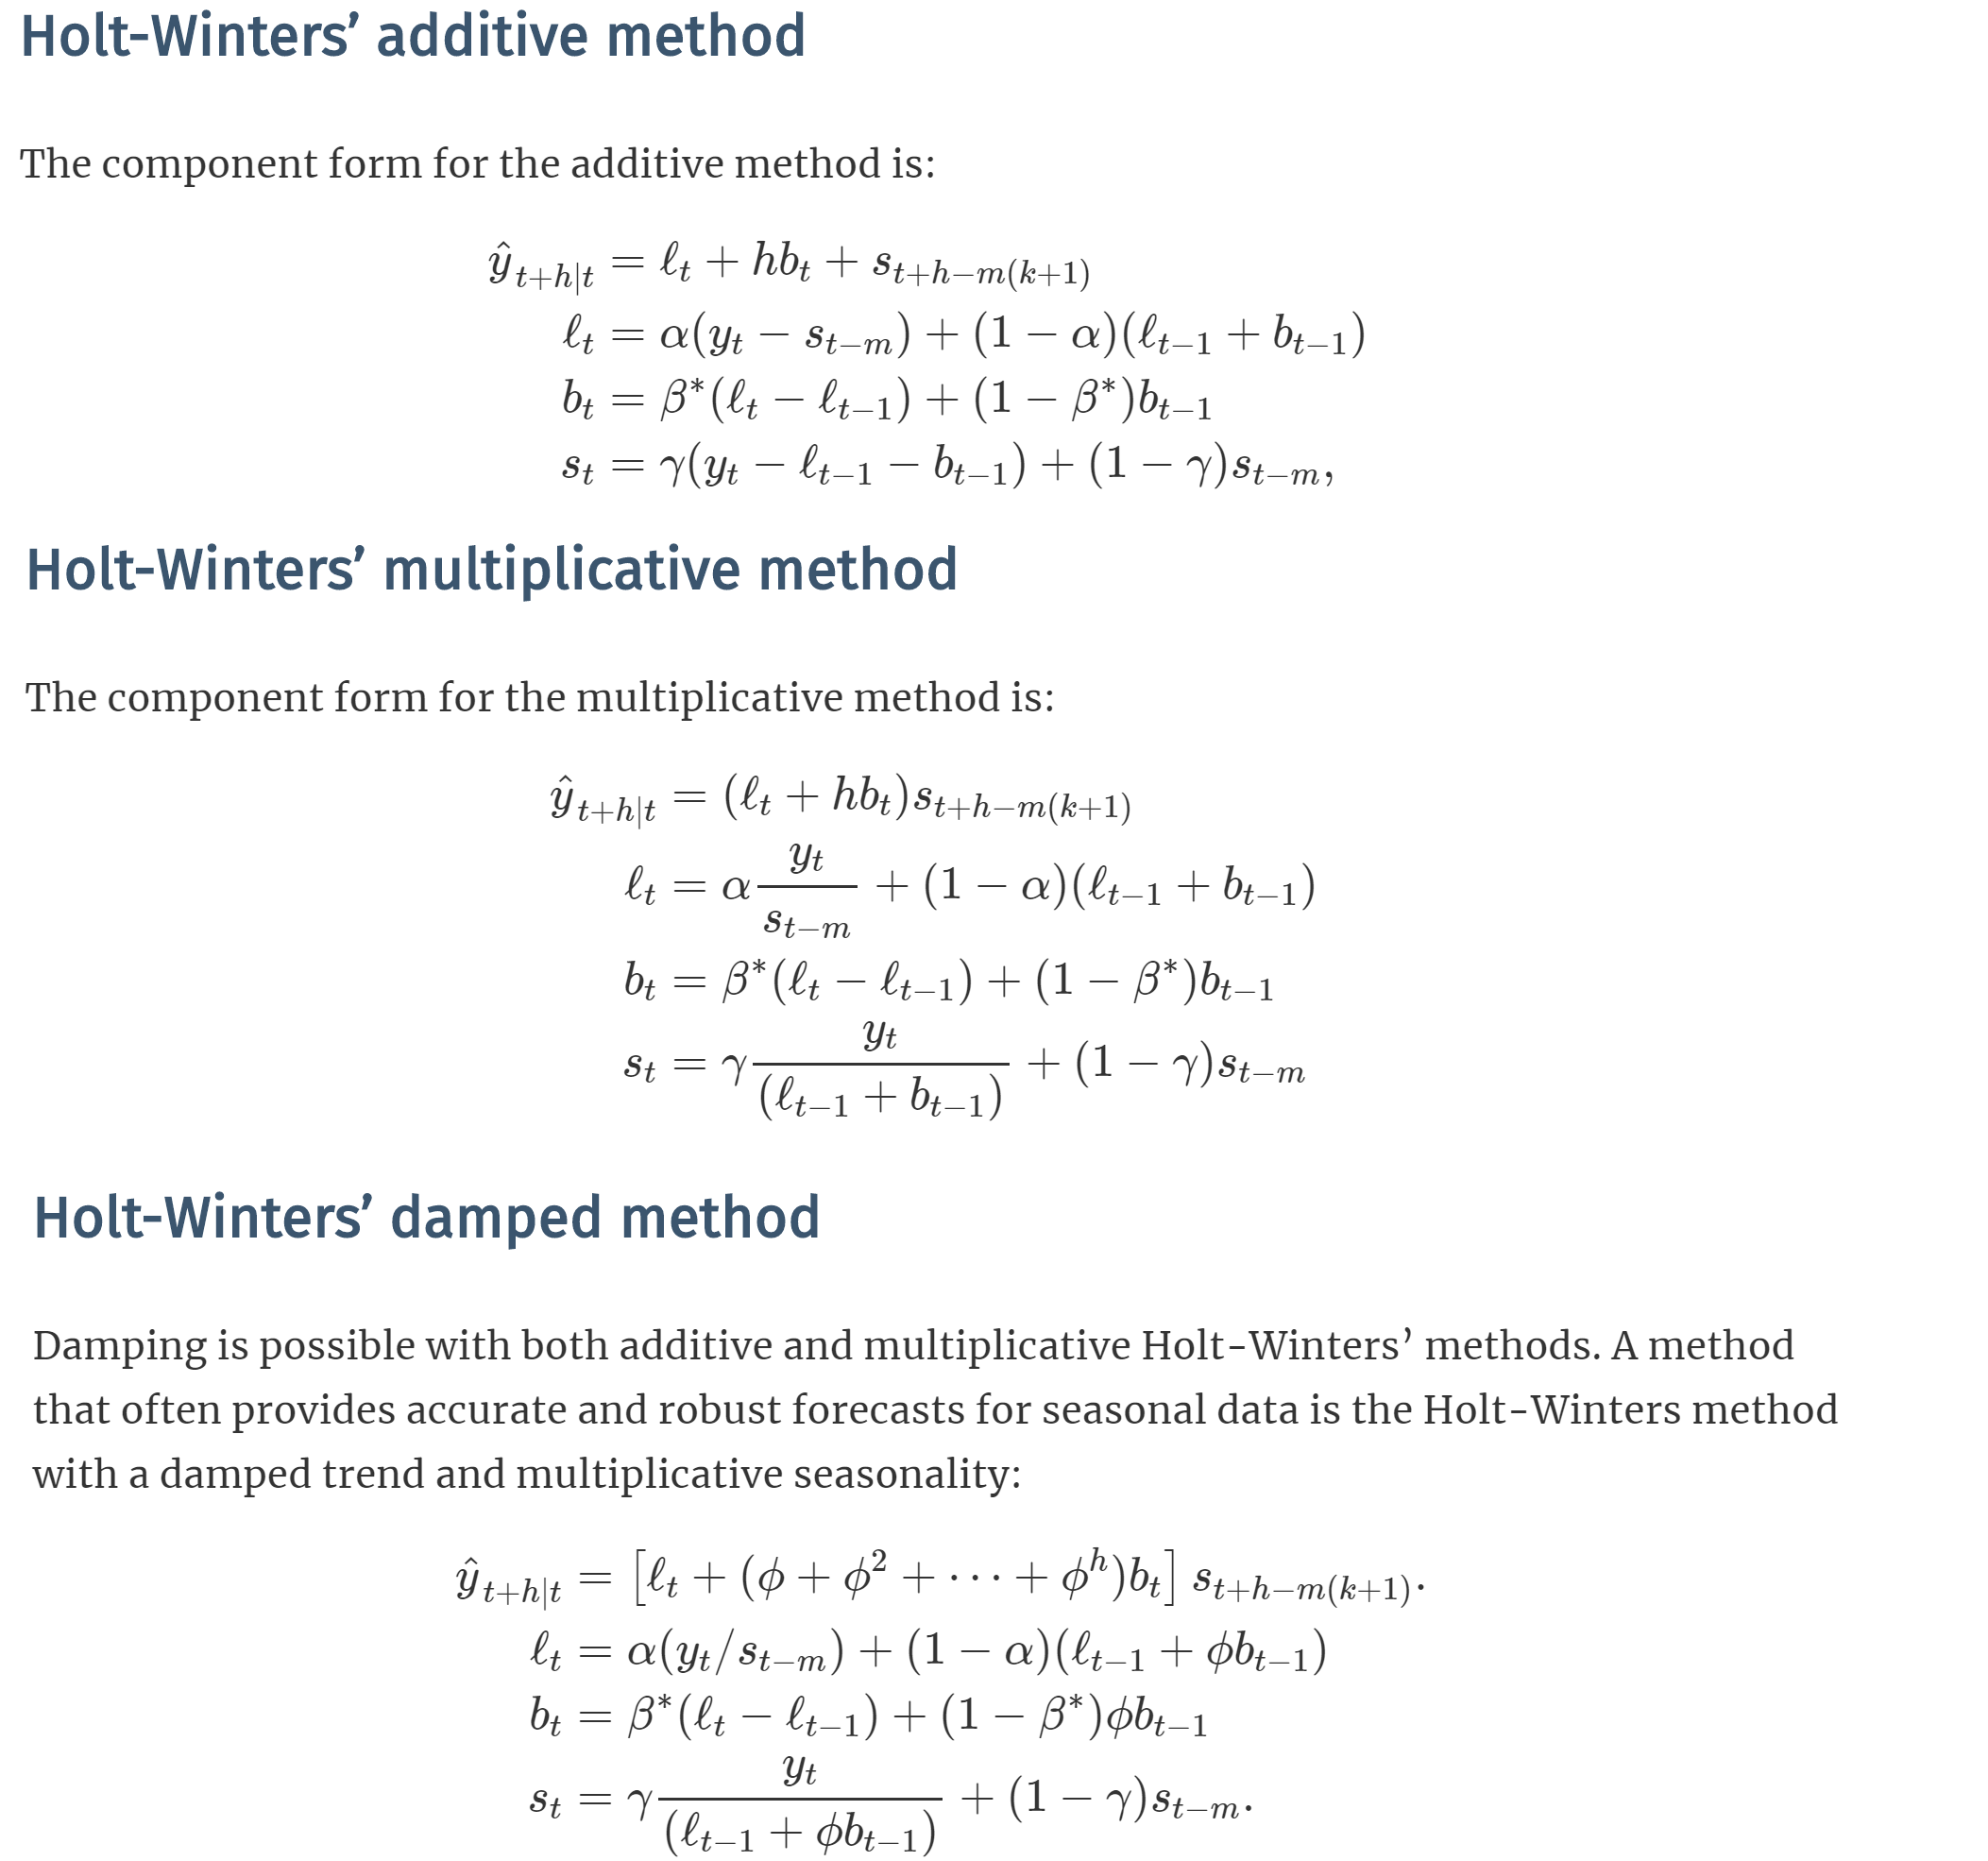

In [156]:
Image("img/holt_winter.png")

### Best result: Damped trend, multiplicative seasonality

# ETS (Error, Trend, Seasonality)

## N/M/A: None, Multiplicative, or Additive for each of the three components in our time series.

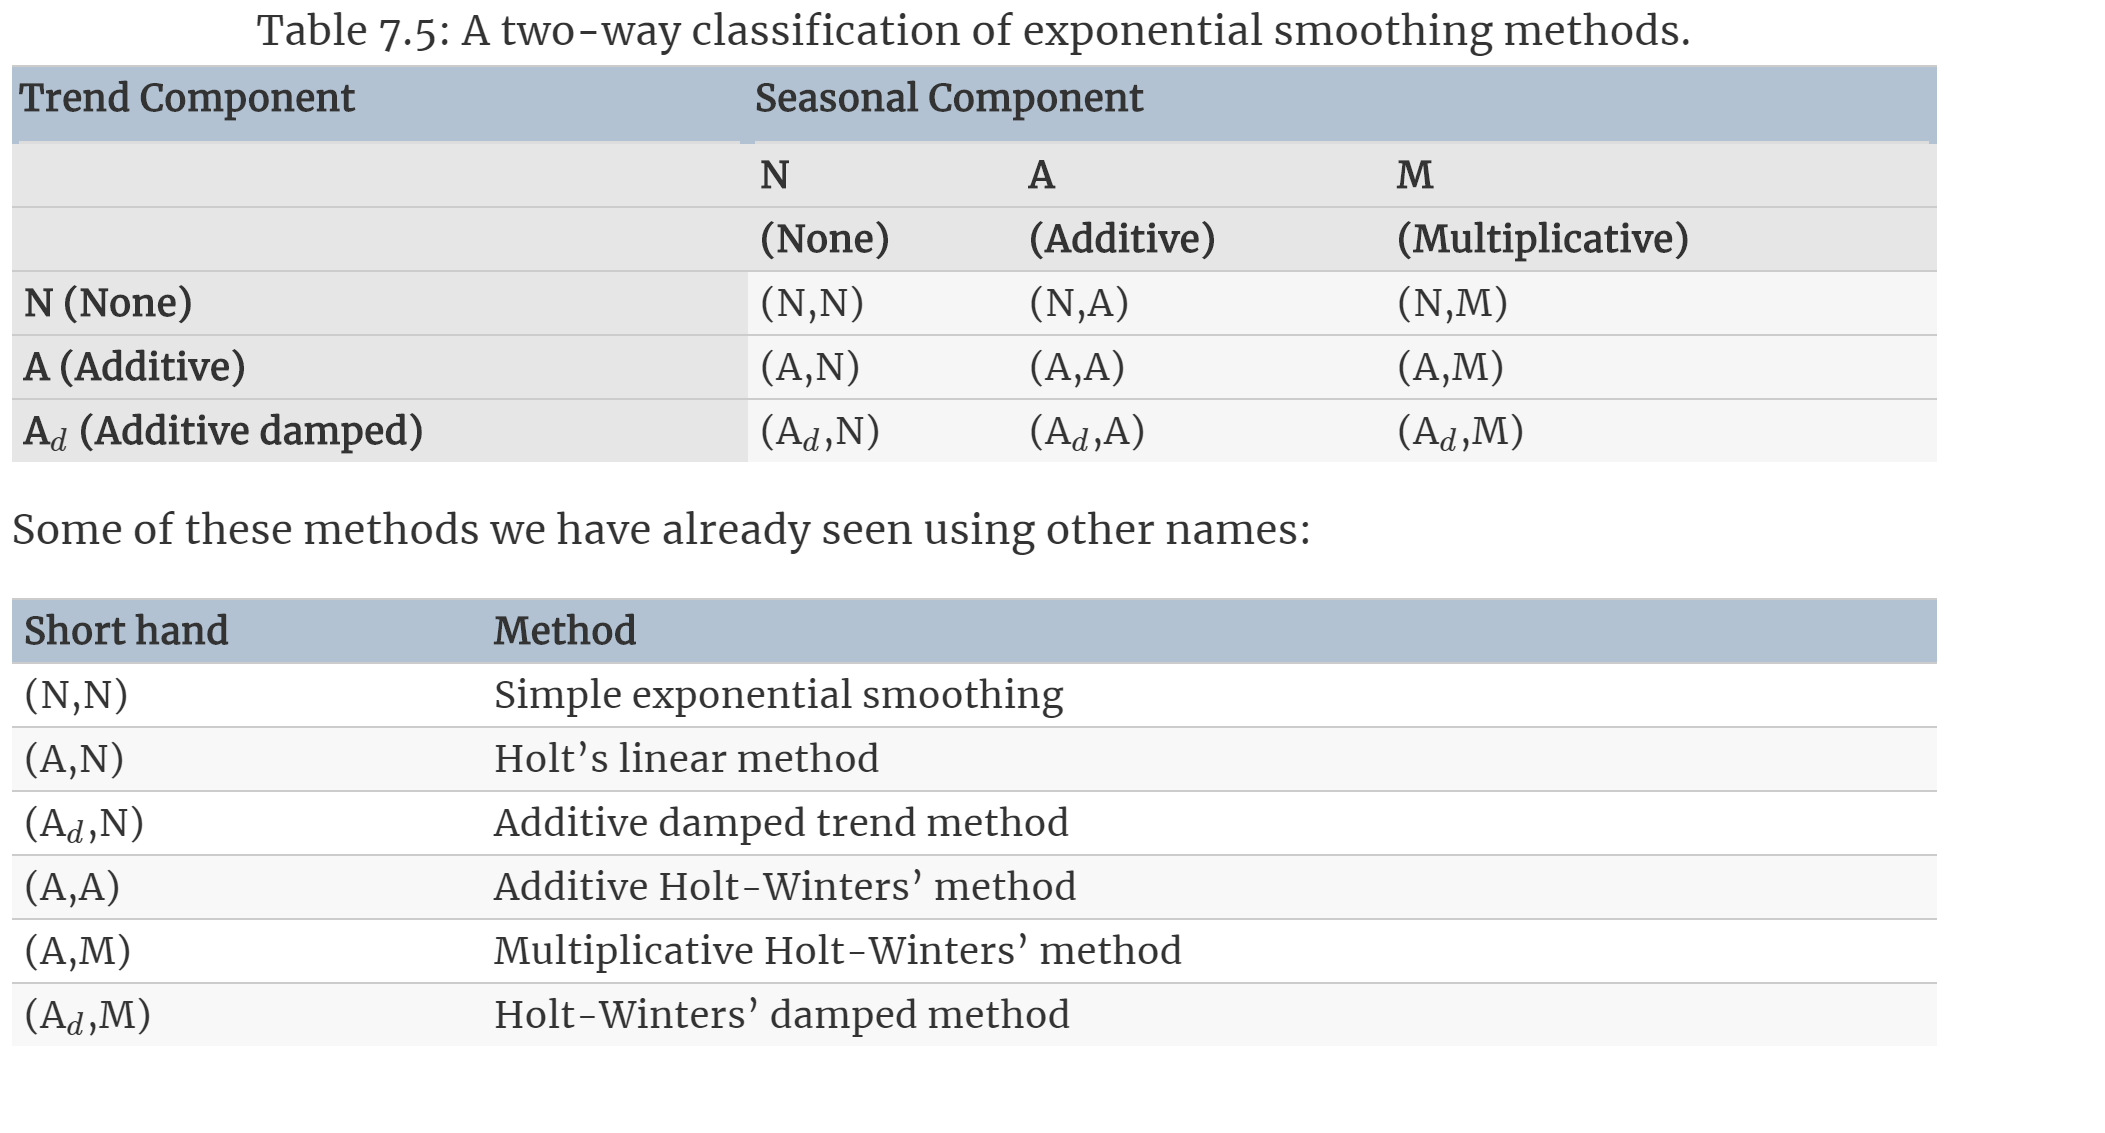

In [157]:
Image("img/summary_holt_damp_winter2.png")

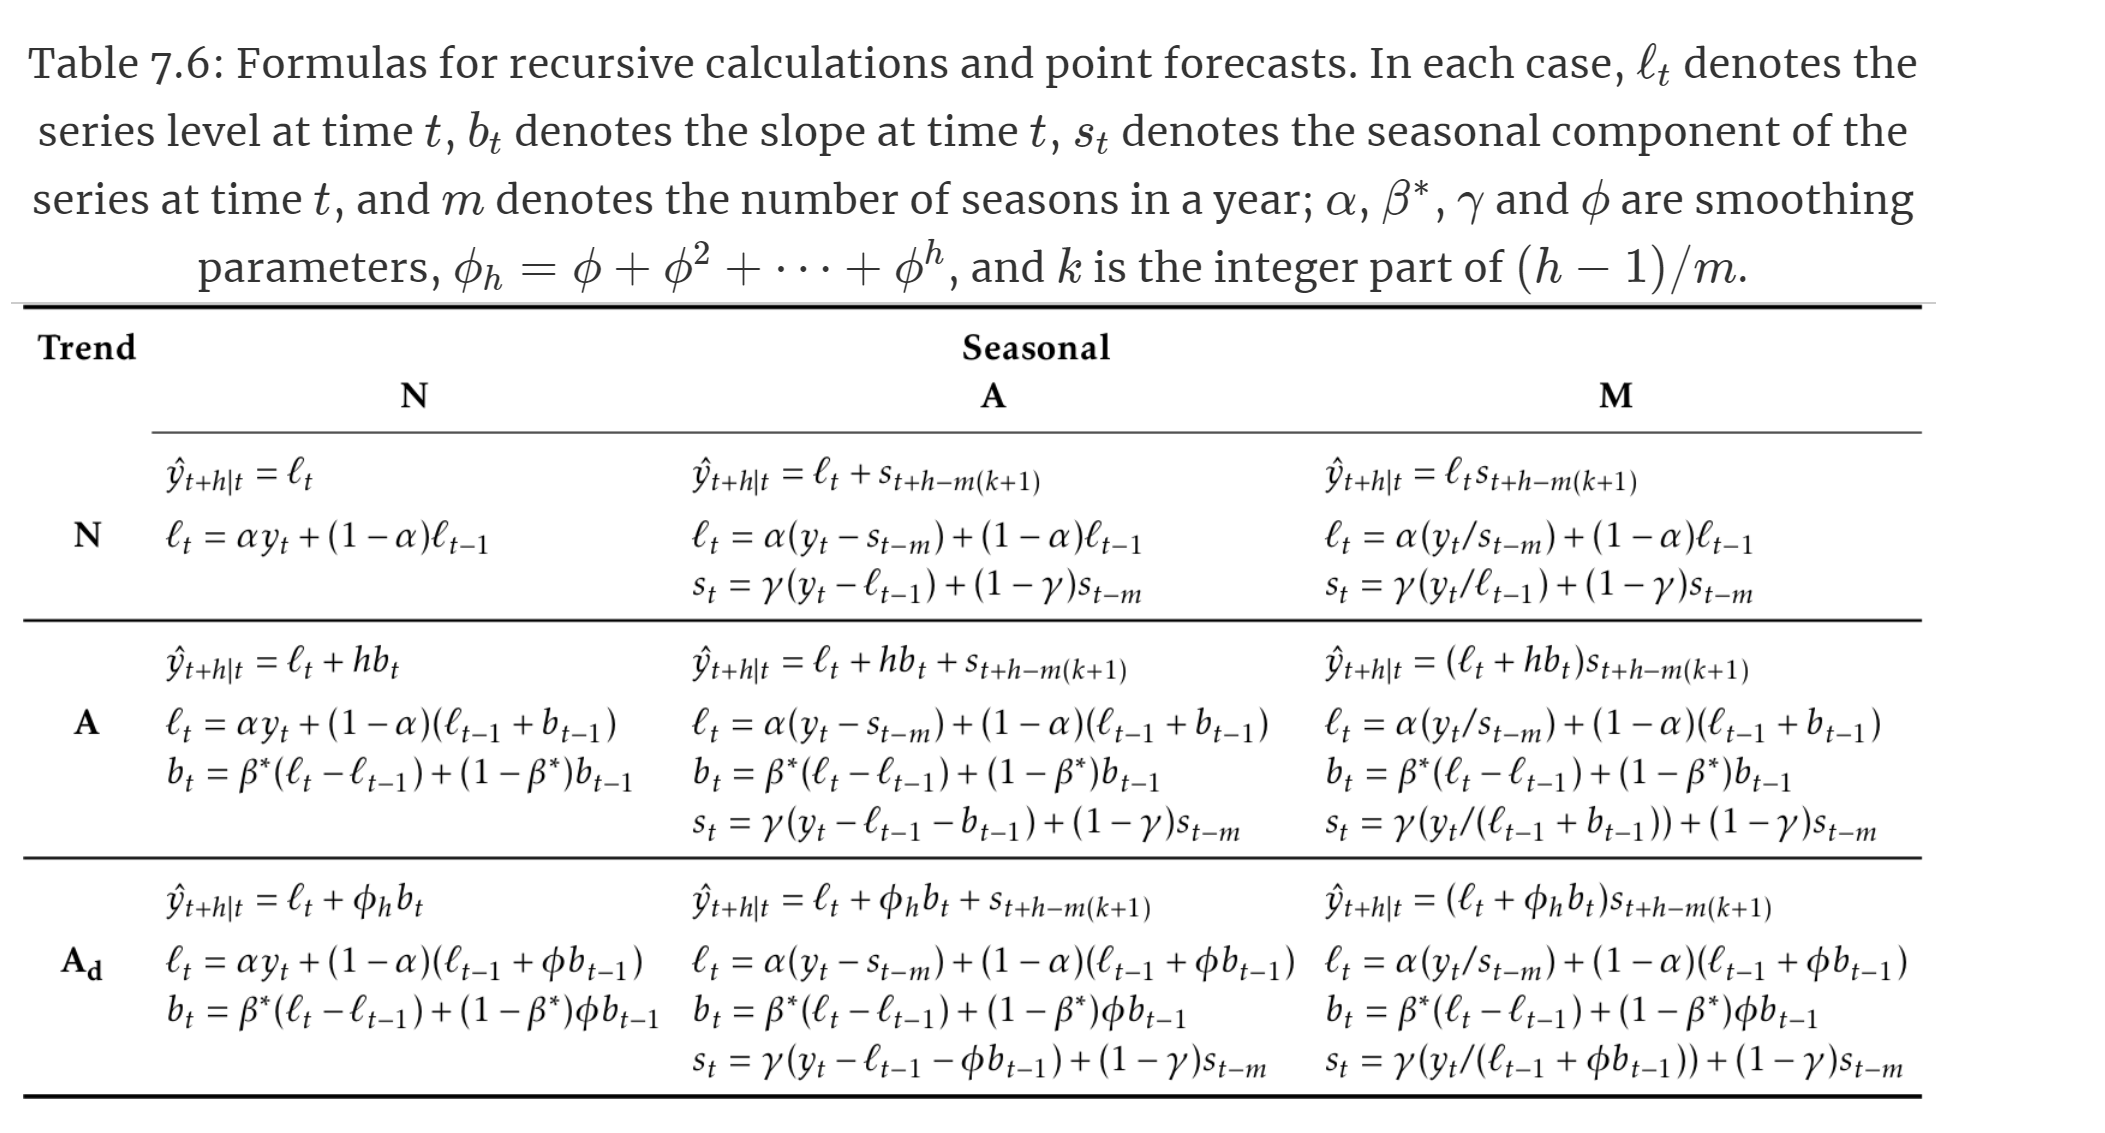

In [158]:
Image("img/summary_holt_damp_winter1.png")

In [36]:
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [38]:
import pandas as pd
df = pd.read_excel("champagne-sales.xlsx")

In [39]:
df.head()

,Month,Champagne Sales
0,1-01,2851
1,1-02,2672
2,1-03,2755
3,1-04,2721
4,1-05,2946


In [44]:
df["Champagne Sales"].values

array([ 2851,  2672,  2755,  2721,  2946,  3036,  2282,  2212,  2922,
        4301,  5764,  7132,  2541,  2475,  3031,  3266,  3776,  3230,
        3028,  1759,  3595,  4474,  6838,  8357,  3113,  3006,  4047,
        3523,  3937,  3986,  3260,  1573,  3528,  5211,  7614,  9254,
        5375,  3088,  3718,  4514,  4520,  4539,  3663,  1643,  4739,
        5428,  8314, 10651,  3633,  4292,  4154,  4121,  4647,  4753,
        3965,  1723,  5048,  6922,  9858, 11331,  4016,  3957,  4510,
        4276,  4968,  4677,  3523,  1821,  5222,  6873, 10803, 13916,
        2639,  2899,  3370,  3740,  2927,  3986,  4217,  1738,  5221,
        6424,  9842, 13076,  3934,  3162,  4286,  4676,  5010,  4874,
        4633,  1659,  5951,  6981,  9851, 12670], dtype=int64)

In [65]:
def concat_funct(a, b):
    return a+'-'+b+'-01'

df['year'] = df['Month'].apply(lambda x:'200'+x[0])
df['month'] = df['Month'].apply(lambda x:x[-2:])
df['full-year-month'] = df.apply(lambda x:str(concat_funct(x.year, x.month)), axis=1)

In [70]:
df['full-year-month'] = pd.to_datetime(df['full-year-month'])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
Month              96 non-null object
Champagne Sales    96 non-null int64
year               96 non-null object
month              96 non-null object
full-year-month    96 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.8+ KB


In [73]:
df.head()

,Month,Champagne Sales,year,month,full-year-month
0,1-01,2851,2001,01,2001-01-01
1,1-02,2672,2001,02,2001-02-01
2,1-03,2755,2001,03,2001-03-01
3,1-04,2721,2001,04,2001-04-01
4,1-05,2946,2001,05,2001-05-01


In [85]:
New_df = pd.DataFrame(df["Champagne Sales"].values, index=df['full-year-month'].values, columns=['Champagne_Sales'])

In [94]:
New_df.tail(20)

,Champagne_Sales
2007-05-01,2927
2007-06-01,3986
2007-07-01,4217
2007-08-01,1738
2007-09-01,5221
2007-10-01,6424
2007-11-01,9842
2007-12-01,13076
2008-01-01,3934
2008-02-01,3162


In [93]:
New_df.shape[0]

96

<Figure size 1440x720 with 0 Axes>

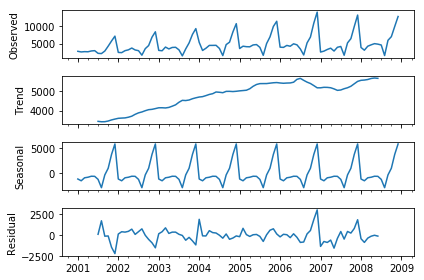

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
decomposition = sm.tsa.seasonal_decompose(New_df["Champagne_Sales"], model='additive')
fig = decomposition.plot()
plt.show()

In [99]:
train = New_df.loc['2001-01-01':'2007-12-01']
test = New_df.loc['2007-12-01':]

In [126]:
import numpy as np
fit_holt = Holt(np.asarray(train['Champagne_Sales']), exponential=False, damped=True).fit(optimized=True)

In [127]:
y_predict = test.copy()
y_predict['Holt'] = fit_holt.forecast(len(test))

In [128]:
y_predict

,Champagne_Sales,Holt
2007-12-01,13076,12877.248685
2008-01-01,3934,12877.248685
2008-02-01,3162,12877.248685
2008-03-01,4286,12877.248685
2008-04-01,4676,12877.248685
2008-05-01,5010,12877.248685
2008-06-01,4874,12877.248685
2008-07-01,4633,12877.248685
2008-08-01,1659,12877.248685
2008-09-01,5951,12877.248685


In [129]:
fit_holt_exp = Holt(np.asarray(train['Champagne_Sales']), exponential=True, damped=True).fit()
y_predict['Holt_exp'] = fit_holt_exp.forecast(len(test))

In [130]:
y_predict

,Champagne_Sales,Holt,Holt_exp
2007-12-01,13076,12877.248685,12263.168736
2008-01-01,3934,12877.248685,11504.578561
2008-02-01,3162,12877.248685,10796.381858
2008-03-01,4286,12877.248685,10135.019067
2008-04-01,4676,12877.248685,9517.196052
2008-05-01,5010,12877.248685,8939.863322
2008-06-01,4874,12877.248685,8400.196951
2008-07-01,4633,12877.248685,7895.581060
2008-08-01,1659,12877.248685,7423.591719
2008-09-01,5951,12877.248685,6981.982144


In [131]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [132]:
model = ExponentialSmoothing(np.asarray(train['Champagne_Sales']), trend="add", seasonal="add", seasonal_periods=12)
model2 = ExponentialSmoothing(np.asarray(train['Champagne_Sales']), trend="add", seasonal="add", seasonal_periods=12, damped=True)
model3 = ExponentialSmoothing(np.asarray(train['Champagne_Sales']), trend="add", seasonal="mul", seasonal_periods=12, damped=True)

In [133]:
fit = model.fit()
y_predict['Holt_winter_aa'] = fit.forecast(len(test))
fit2 = model2.fit()
y_predict['Holt_winter_aad'] = fit2.forecast(len(test))
fit3 = model3.fit()
y_predict['Holt_winter_amd'] = fit3.forecast(len(test))

In [134]:
y_predict

,Champagne_Sales,Holt,Holt_exp,Holt_winter_aa,Holt_winter_aad,Holt_winter_amd
2007-12-01,13076,12877.248685,12263.168736,2308.948189,2537.551139,3502.851861
2008-01-01,3934,12877.248685,11504.578561,2610.076107,2835.375295,3558.276226
2008-02-01,3162,12877.248685,10796.381858,3149.030104,3368.098576,4069.249995
2008-03-01,4286,12877.248685,10135.019067,3485.668445,3708.528801,4277.189890
2008-04-01,4676,12877.248685,9517.196052,2960.680416,3147.921819,4206.935659
2008-05-01,5010,12877.248685,8939.863322,3925.412706,4105.314851,4743.915168
2008-06-01,4874,12877.248685,8400.196951,3958.878358,4163.024296,4343.540779
2008-07-01,4633,12877.248685,7895.581060,1545.513512,1758.207082,1964.805420
2008-08-01,1659,12877.248685,7423.591719,5000.976124,5226.370873,5631.876974
2008-09-01,5951,12877.248685,6981.982144,6265.782270,6493.825275,7154.921995


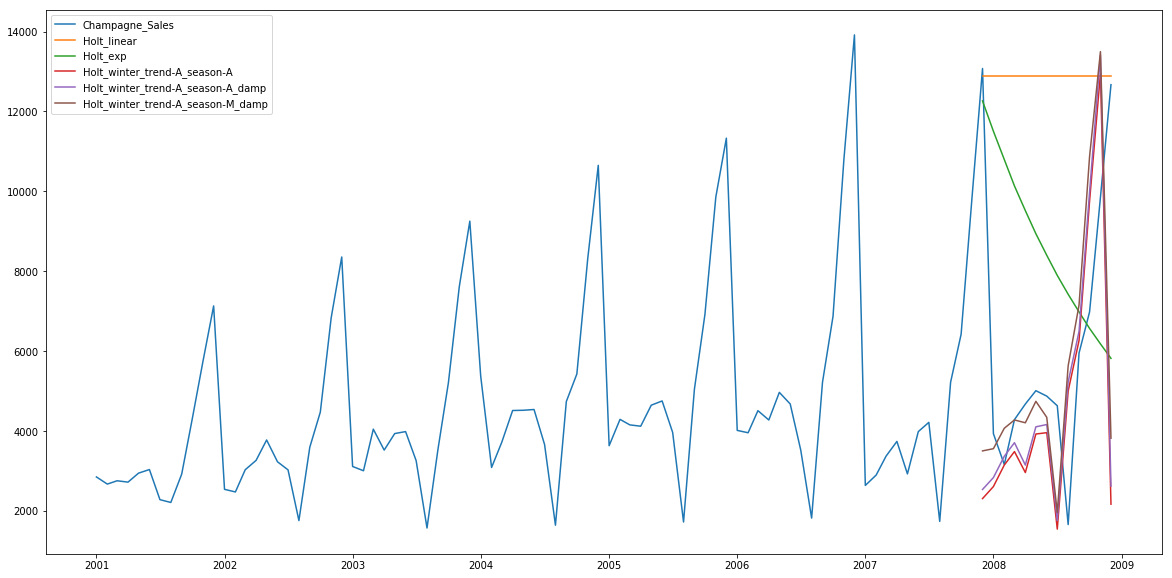

In [135]:
plt.figure(figsize=(20,10))
plt.plot(New_df.index, New_df['Champagne_Sales'])
#plt.plot(y_predict.index,y_predict['Champagne_Sales'])
plt.plot(y_predict.index,y_predict['Holt'], label='Holt_linear')
plt.plot(y_predict.index,y_predict['Holt_exp'], label='Holt_exp')
plt.plot(y_predict.index,y_predict['Holt_winter_aa'], label='Holt_winter_trend-A_season-A')
plt.plot(y_predict.index,y_predict['Holt_winter_aad'], label='Holt_winter_trend-A_season-A_damp')
plt.plot(y_predict.index,y_predict['Holt_winter_amd'], label='Holt_winter_trend-A_season-M_damp')
plt.legend()

In [144]:
model0 = SimpleExpSmoothing(np.asarray(train['Champagne_Sales']))
fit0 = model0.fit()
y_predict['Holt_simple'] = fit0.forecast(len(test))
model00 = ExponentialSmoothing(np.asarray(train['Champagne_Sales']),trend='add', seasonal=False, seasonal_periods=None, damped=False)
fit00 = model00.fit()
y_predict['Holt_linear'] = fit00.forecast(len(test))

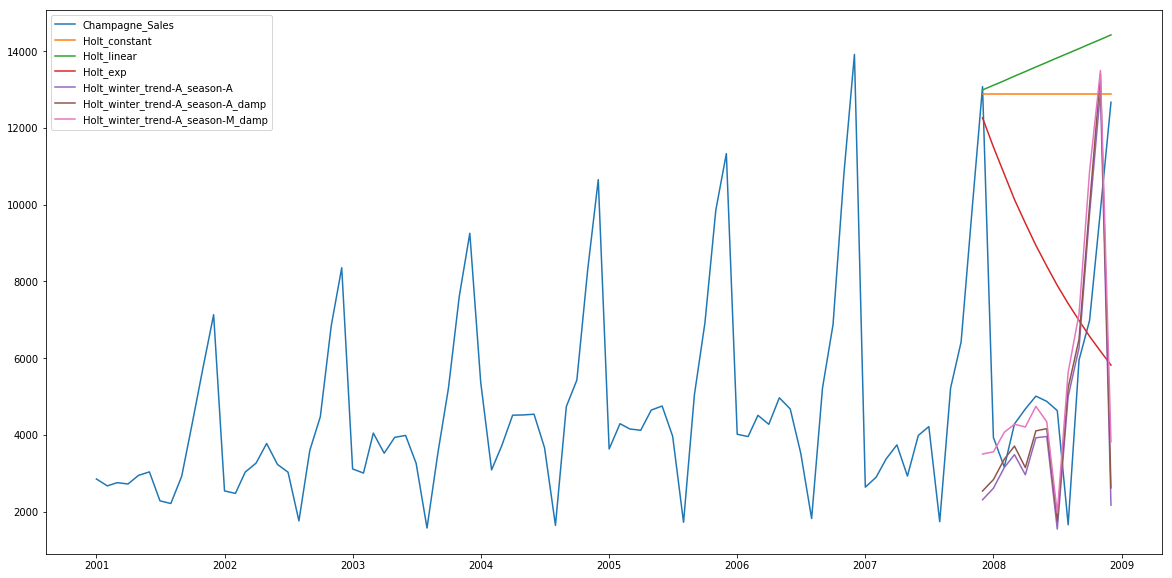

In [145]:
plt.figure(figsize=(20,10))
plt.plot(New_df.index, New_df['Champagne_Sales'])
plt.plot(y_predict.index,y_predict['Holt_simple'], label='Holt_constant')
plt.plot(y_predict.index,y_predict['Holt_linear'], label='Holt_linear')
plt.plot(y_predict.index,y_predict['Holt_exp'], label='Holt_exp')
plt.plot(y_predict.index,y_predict['Holt_winter_aa'], label='Holt_winter_trend-A_season-A')
plt.plot(y_predict.index,y_predict['Holt_winter_aad'], label='Holt_winter_trend-A_season-A_damp')
plt.plot(y_predict.index,y_predict['Holt_winter_amd'], label='Holt_winter_trend-A_season-M_damp')
plt.legend()